In [54]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import cm

# Simulation d'un augmentorium :

---
Introduction :

L'augmentorium est un dispositif de lutte biologique mis en place dans les cultures touchées par la mouche des fruits.  Il peut être vu comme une tente où les fruits infectés sont entreposés. Le ravageur va alors continuer son cycle de reproduction dans l'augmentorium et les auxiliaires (parasites) vont pouvoir s'y reproduire.  
Une grille permet, via une taille de maille optimale, d'empêcher le ravageur de ressortir de l'augmentorium mais de laisser librement les auxiliaires (plus petits) sortir.
 Cette méthode permet d'augmenter le taux d'auxiliaire par rapport au ravageur, son efficacité à été montré sur des cultures.

<div>
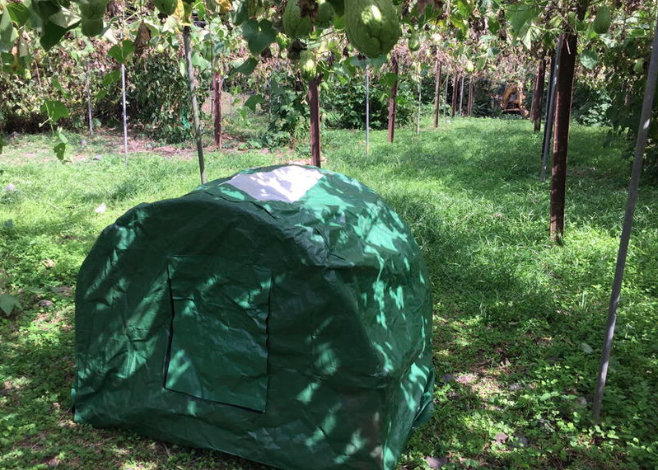
</div>

---

## 1) **Etude d'une population répartie en deux structures spatiales avec migration:**

*Cette analyse s'appuie sur celle effectuée par [R.Arditi et al.](https://doi.org/10.1016/j.tpb.2015.10.001) en 2015 et a été retravaillée pour coller au modèle de l'augmentorium.*

On s'intéresse à une culture avec des ravageurs et où on va confiner les fruits attaqués dans une structure (une benne par exemple). On met alors en place seulement une mesure prophylactique de débarassage des fruits pourris.  

On part d'un modèle tel que :
$$ 
\left\{\begin{array}{1}
\dot x = r_xx\left(1-\frac{x}{K_x}\right)+\beta(y-x)\\
\dot y = r_yy\left(1-\frac{y}{K_y}\right)+\beta(x-y)
\end{array}\right.
$$

avec $ \dot x $ la population de ravageurs dans la culture et $ \dot y $ celle dans un espace scindé de la culture.  
$ \beta $ est le taux de migration entre la structure et la culture, la mixité peut aller de nulle à parfaite ($\beta \in [0, +\infty[$).  
$r_x$ et $r_y$ sont respectivement le taux de croissance dans la structure 1 et 2.  
$K_x$ et $K_y$ sont la capacité de charge de la structure 1 et 2.

Ce modèle décrit une situation ou une barrière est mise en deux espaces et où la migration se fait dans les deux sens. Les populations suivent dans chaque espace une croissance logistique.

**Hypothèses propres à la situation d'augmentorium :**

On a un taux de croissance plus fort dans l'augmentorium que dans la culture car regrouper les fruits favorise la croissance des ravageurs et les débarasser de la culture a tendance à faire baisser le taux de croissance des ravageurs dans la culture. On a donc $r_x<r_y$. 

Maintenant, en fonction de la culture qu'on va considérer on peut avoir $K_x>K_y$ et inversement. En effet, si la culture est remontante ie qu'elle produit tout au long de l'année, les apports de fruits dans l'augmentorium ne seront jamais excessifs par rapport au nombre de fruits à l'extérieur, impliquant une capacité maximale plus forte pour la culture ($K_x>K_y$). Par contre si la culture est non-remontante on aura énormément de fruits dans la structure sur une courte période impliquant une possible capacité maximale plus forte pour la structure ($K_x<K_y$).


---

### A) Plan de phase:

$$ 
\left\{\begin{array}{1}
\dot x = 0 \Leftrightarrow  y^*=r_xx^*\left(\frac{1}{r_x}-\frac{1}{\beta}+\frac{x^*}{\beta K_x}\right)\\
\dot y =0 \Leftrightarrow  x^*=r_yy^*\left(\frac{1}{r_y}-\frac{1}{\beta}+\frac{y^*}{\beta K_y}\right)
\end{array}\right.
$$

L'équilibre $ (0,0) $ apparaît alors trivialement. Pour calculer $(x^*,y^*)$ on va injecter $x^*$ dans $y^*$. Ceci donne après développement et factorisation un polynôme du quatrième degré :

$$ 
y\left(r_xr_y\left[\frac{1}{\beta}\left(\frac{1}{\beta}-\frac{1}{r_x}-\frac{1}{r_y}\right)+\frac{1}{r_xr_y}\right]-1\right)+
\frac{y^2r_xr_y}{\beta}\left[\frac{1}{K_y}\left(\frac{1}{r_x}-\frac{1}{\beta}\right)+\frac{1}{K_x}\left(\frac{1}{r_y}-\frac{2}{\beta}+\frac{r_y}{\beta^2}\right)\right]+\\
\frac{2y^3r_xr_y}{\beta^2 K_xK_y}\left(1-\frac{r_y}{\beta}\right)+
\frac{y^4r_xr_y^2}{\beta^3K_y^2K_x} = 0
$$

Qu'on va résoudre grâce à numpy pour avoir les coordonées de l'équilibre. On ajoute le champ de vecteur également.  
*Rappel : Les croisements entre isoclines donnent les équilibres.*

---

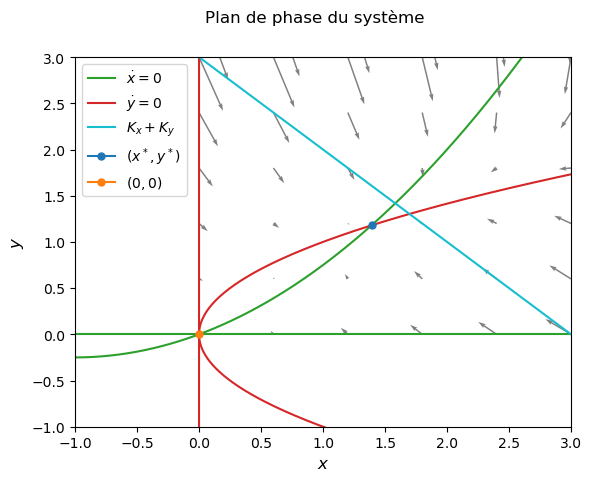

In [58]:
#Définition du modèle et des paramètres :
def aug(etat,t,param):
    rx,ry,Kx,Ky,b=param
    x,y=etat
    s=[rx*x*(1-x/Kx)-b*(x-y),ry*y*(1-y/Ky)+b*(x-y)]
    return s 

# Temps d'intégration
ti = np.arange(0,10,0.01)

# Etats initiaux
x0=2
y0=0
e0=[x0,y0]

# Paramètres:
rx=0.5 #taux de croissance dans structure 1
ry=1 #taux de croissance dans structure 2
Kx=2
Ky=1
b=1

param_aug=np.array([rx,ry,Kx,Ky,b])

# Simulation:
s=odeint(aug,e0,ti,args=(param_aug,))

#On utilise numpy pour résoudre le polynôme, il faut donc défnir un monome x, un polynôme p et prendre ses solutions.
#Monome y
y=np.polynomial.Polynomial([0,1])

#Polynome :
pol = y*(rx*ry*((1/b)*((1/b)-(1/rx)-(1/ry))+1/(rx*ry))-1)+(y**2)*((rx*ry)/b)*((1/Ky)*((1/rx)-(1/b))+(1/Kx)*((1/ry)-(2/b)+(ry/(b**2))))+2*(y**3)*((rx*ry)/((b**2)*Kx*Ky))*(1-(ry/b))+(y**4)*((rx*(ry**2))/((b**3)*(Ky**2)*Kx))

#Solution qu'on obtient avec un masque booléen:
sol = pol.roots()[(np.isreal(pol.roots())) 
            *(pol.roots() > 0)]
yeq=sol[0].real

#On déduit x via sa définition par le système:
xeq=(ry*yeq*((1/ry)-(1/b)+(yeq/(b*Ky)))).real


#Affichage du nouveau graphe avec le point d'intersection:
#Plan de phase:
fig,ax=plt.subplots(1,1)
fig.suptitle('Plan de phase du système')

# Isocline nulles:
yt=np.arange(-10,10,0.01)
xt=np.arange(-10,10,0.01)
#Pour xdot = 0:

ax.plot(xt,xt*(1/b)*(rx*((xt/Kx)-1)+b),color='C2',label='$\dot x=0$')
ax.plot(np.zeros_like(yt),yt,color='C3')

#Pour ydot = 0:
ax.plot(yt*(1/b)*(ry*((yt/Ky)-1)+b),yt,color='C3',label='$\dot y=0$')
ax.plot(xt,np.zeros_like(xt),color='C2')

#On réduit la vue à ce qui nous intéresse:
ax.set_xlim(left=-1,right=3)
ax.set_ylim(top=3,bottom=-1)

#On nomme les axes:
ax.set_xlabel('$x$',fontsize='12')
ax.set_ylabel('$y$',fontsize='12')

#On trace la droite des capacités:
x=np.arange(0,10,0.01)
ax.plot(x,-x+Kx+Ky,label='$K_x+K_y$',color='C9')

#On plot les deux équilibres:
ax.plot(xeq.real,yeq.real,label='$(x^*,y^*)$',marker='.',markersize=10)
ax.plot(0,0,label='$(0,0)$',marker='.',markersize=10)

#Localisation de la légende:
ax.legend(loc='upper left')

# Ajout du champ de vecteur via la fonction quiver :
xg=np.arange(0,5,0.6)
yg=np.arange(0,5,0.6)
X,Y=np.meshgrid(xg,yg)

dx,dy=aug([X,Y],0,param_aug)
ax.quiver(X,Y,dx,dy,angles='xy',color='grey',scale=80,width=0.003)

---
Ainsi, on observe que l'équilibre $(0,0)$ est instable et $(x^*,y^*)$ est stable graphiquement, par le champ de vecteurs.   

On remarque que l'équilibre atteint n'est pas sur la droite $x^*+y^*=K_x+K_y$ , ceci implique que la structuration de l'espace perturbe les équilibres qui auraient dû être la somme des équilires des deux régions (la logistique tend vers la capacité maximale à l'équilibre).   
Si l'équilbre est au dessus de la droite cyan on dit que le système subit une **inflation** c'est à dire que la valeur de l'équilibre final vaut plus que les deux capacités biotiques réunies ($ 1+1 \ne 2$).

Plus généralement, on peut montrer (*preuve sur le document d'Arditi cité plus haut*) qu'en cas de mixité parfaite entre les deux patchs ($\beta \to \infty$) on a :
$x^*+y^* = K_x + K_y + (K_x-K_y)\frac{r_xK_y-r_yK_x}{r_xK_y+r_yK_x}$

Ce qui montre que en général on a pas $x^*+y^* = K_x + K_x $. De plus, si $K_y<K_x$ (culture remontante) et si $r_xK_y<r_yK_x$ alors $x^*+y^* < K_x+K_y $ ce qui nous intéresse particulièrement pour la lutte biologique (et inversement pour les cultures non remontantes).  

Enfin, en faisant $ x^* + y^* $ on a (en abandonnant les étoiles par commodité):
$$ 
r_xx\left(1-\frac{x}{K_x}\right)+r_yy\left(1-\frac{y}{K_y}\right) = 0 \\
$$
Autrement dit l'équation d'une ellipse. Donc les points d'équilibres vivent sur une ellipse (si on ne modifie que $\beta$ ), qu'on va tracer :

---

Text(1.3912415391197235, -0.2, '$x^*$')

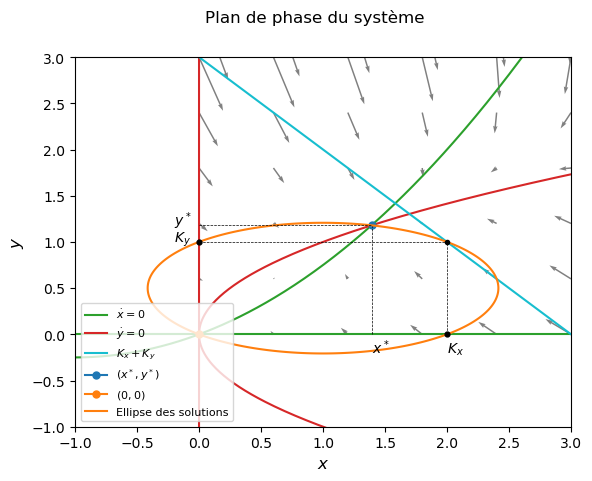

In [28]:
##On a le même code, voir en bas les changements:
#Définition du modèle et des paramètres :
def aug(etat,t,param):
    rx,ry,Kx,Ky,b=param
    x,y=etat
    s=[rx*x*(1-x/Kx)-b*(x-y),ry*y*(1-y/Ky)+b*(x-y)]
    return s 

# Temps d'intégration
ti = np.arange(0,10,0.01)

# Etats initiaux
x0=2
y0=0
e0=[x0,y0]

# Paramètres:
rx=0.5 #taux de croissance dans structure 1
ry=1 #taux de croissance dans structure 2
Kx=2
Ky=1
b=1

param_aug=np.array([rx,ry,Kx,Ky,b])

# Simulation:
s=odeint(aug,e0,ti,args=(param_aug,))

#On utilise numpy pour résoudre le polynôme, il faut donc défnir un monome x, un polynôme p et prendre ses solutions.
#Monome y
y=np.polynomial.Polynomial([0,1])

#Polynome :
pol = y*(rx*ry*((1/b)*((1/b)-(1/rx)-(1/ry))+1/(rx*ry))-1)+(y**2)*((rx*ry)/b)*((1/Ky)*((1/rx)-(1/b))+(1/Kx)*((1/ry)-(2/b)+(ry/(b**2))))+2*(y**3)*((rx*ry)/((b**2)*Kx*Ky))*(1-(ry/b))+(y**4)*((rx*(ry**2))/((b**3)*(Ky**2)*Kx))

#Solution qu'on obtient avec un masque booléen:
sol = pol.roots()[(np.isreal(pol.roots())) 
            *(pol.roots() > 0)]
yeq=sol[0].real

#On déduit x via sa définition par le système:
xeq=(ry*yeq*((1/ry)-(1/b)+(yeq/(b*Ky)))).real


#Affichage du nouveau graphe avec le point d'intersection:
#Plan de phase:
fig,ax=plt.subplots(1,1)
fig.suptitle('Plan de phase du système')

# Isocline nulles:
yt=np.arange(-10,10,0.01)
xt=np.arange(-10,10,0.01)
#Pour xdot = 0:

ax.plot(xt,xt*(1/b)*(rx*((xt/Kx)-1)+b),color='C2',label='$\dot x=0$')
ax.plot(np.zeros_like(yt),yt,color='C3')

#Pour ydot = 0:
ax.plot(yt*(1/b)*(ry*((yt/Ky)-1)+b),yt,color='C3',label='$\dot y=0$')
ax.plot(xt,np.zeros_like(xt),color='C2')

#On réduit la vue à ce qui nous intéresse:
ax.set_xlim(left=-1,right=3)
ax.set_ylim(top=3,bottom=-1)

#On nomme les axes:
ax.set_xlabel('$x$',fontsize='12')
ax.set_ylabel('$y$',fontsize='12')

#On trace la droite des capacités:
x=np.arange(0,10,0.01)
ax.plot(x,-x+Kx+Ky,label='$K_x+K_y$',color='C9')

#On plot les deux équilibres:
ax.plot(xeq.real,yeq.real,label='$(x^*,y^*)$',marker='.',markersize=10)
ax.plot(0,0,label='$(0,0)$',marker='.',markersize=10)

# Ajout du champ de vecteur via la fonction quiver :
xg=np.arange(0,5,0.6)
yg=np.arange(0,5,0.6)
X,Y=np.meshgrid(xg,yg)

dx,dy=aug([X,Y],0,param_aug)
ax.quiver(X,Y,dx,dy,angles='xy',color='grey',scale=80,width=0.003)

####################### Nouveau : 

#On trace l'ellipse avec une technique utilisant la fonction contour:
xg2=np.arange(-5,5,0.01)
yg2=np.arange(-5,5,0.01)
X2,Y2=np.meshgrid(xg2,yg2)

X=rx*X2*(1-X2/Kx)
Y=ry*Y2*(1-Y2/Ky)
ax.contour(X2,Y2,(X+Y),[0],colors='C1')
ax.plot(0,0,color='C1',label='Ellipse des solutions')

#Localisation de la légende:
ax.legend(loc='lower left',fontsize = 8)

#On place les différents points d'intérêts...
xv=np.arange(0,10)
ax.plot(0,Ky,marker='.',markersize=7,color='k')
ax.plot(Kx,0,marker='.',markersize=7,color='k')
ax.plot(Kx,Ky,marker='.',markersize=6,color='k')

#...et on les relie aux axes:
xc=np.arange(0,Kx,0.01)
ax.plot(xc,Ky*np.ones_like(xc),linestyle='dashed',color='k',linewidth=0.5)
yc=np.arange(0,Ky,0.01)
ax.plot(Kx*np.ones_like(yc),yc,linestyle='dashed',color='k',linewidth=0.5)

#On nomme les points:
ax.text(-0.2,Ky,'$K_y$')
ax.text(Kx,-0.2,'$K_x$')

#On place les points d'équilibres :
ys=np.arange(0,yeq,0.01)
xs=np.arange(0,xeq,0.01)
ax.plot(xeq*np.ones_like(ys),ys,linestyle='dashed',color='k',linewidth=0.5)
ax.plot(xs,yeq*np.ones_like(xs),linestyle='dashed',color='k',linewidth=0.5)
ax.text(-0.2,yeq,'$y^*$')
ax.text(xeq,-0.2,'$x^*$')

---

On remarque que le point $(K_x,K_y)$ est en permanence sur la droite $K_x+K_y$ qui coupe en permanence l'ellipse sauf pour une situation où la droite $K_x+K_y$ est tangente à l'ellipse. Ce cas nous intéresse car il rend compte d'un système entièrement déflationiste.  
L'ellipse, d'équation $f(x,y)=r_xx\left(1-\frac{x}{K_x}\right)+r_yy\left(1-\frac{y}{K_y}\right) = 0 $  , peut être vue comme la ligne de niveau de $f$ en $0$. Ainsi, une équation de la tangente au point $(x_0,y_0)$ serait donnée par:   
$  \frac{\partial f}{\partial x}(x_0,y_0)(x-x_0)+ \frac{\partial f}{\partial y}(x_0,y_0)(y-y_0) = 0$

Dans le cas où $(x_0=K_x , y_0=K_y)$ on a alors $y=-\frac{r_x}{r_y}\left(x-K_x\right) + K_y$ équation de la tangente au point $(K_x,K_y)$.

Pour que le système soit déflationiste on veut que cette équation ait une pente de $-1$ afin d'avoir l'équation de la droite $K_x+K_y$ et garantir la déflation. Ainsi on veut que $r_x=r_y$. 

On sait donc que si le taux de croissance est égale entre les deux structures le système est tout le temps déflationiste.

---
Si on trace la parabole quand $\beta \to \infty$ alors on peut prédire quand le système est déflationiste. En effet, il faut alors que la pente de la parabole en l'infini soit plus grande que la pente de la parabole en $\beta = 0$ (cette pente est alors $\frac{K_y}{K_x}$).  
**Comme on a  $r_x < r_y$, si on a $\frac{K_y}{K_x} \leq 1$ alors le système est déflationiste quelle que soit le degré de migration.**   
Ainsi, dans les cultures remontantes (où $K_x>K_y$) on aura tout le temps un modèle déflationiste pour les ravageurs (si $r_x<r_y$).  
Ceci est intéressant pour l'augmentorium, si on a la capacité de l'augmentorium qui est plus faible que celle de la culture alors le système est toujours négatif pour la population totale de ravageurs.  
On peut aussi voir graphiquement que dans ce cas là on a toujours $x^* < K_x$, c'est ce que l'on cherche à obtenir.

(-0.2, 3.0)

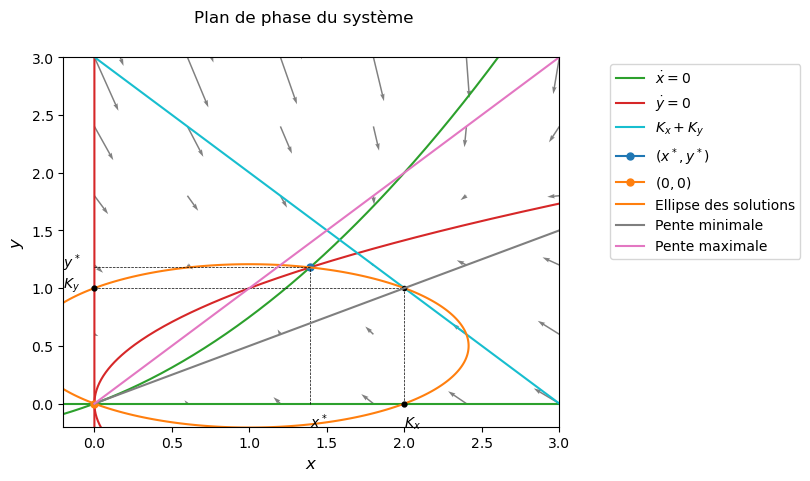

In [27]:
##On a le même code, voir en bas les changements:
#Définition du modèle et des paramètres :
def aug(etat,t,param):
    rx,ry,Kx,Ky,b=param
    x,y=etat
    s=[rx*x*(1-x/Kx)-b*(x-y),ry*y*(1-y/Ky)+b*(x-y)]
    return s 

# Temps d'intégration
ti = np.arange(0,10,0.01)

# Etats initiaux
x0=2
y0=0
e0=[x0,y0]

# Paramètres:
rx=0.5 #taux de croissance dans structure 1
ry=1 #taux de croissance dans structure 2
Kx=2
Ky=1
b=1

param_aug=np.array([rx,ry,Kx,Ky,b])

# Simulation:
s=odeint(aug,e0,ti,args=(param_aug,))

#On utilise numpy pour résoudre le polynôme, il faut donc défnir un monome x, un polynôme p et prendre ses solutions.
#Monome y
y=np.polynomial.Polynomial([0,1])

#Polynome :
pol = y*(rx*ry*((1/b)*((1/b)-(1/rx)-(1/ry))+1/(rx*ry))-1)+(y**2)*((rx*ry)/b)*((1/Ky)*((1/rx)-(1/b))+(1/Kx)*((1/ry)-(2/b)+(ry/(b**2))))+2*(y**3)*((rx*ry)/((b**2)*Kx*Ky))*(1-(ry/b))+(y**4)*((rx*(ry**2))/((b**3)*(Ky**2)*Kx))

#Solution qu'on obtient avec un masque booléen:
sol = pol.roots()[(np.isreal(pol.roots())) 
            *(pol.roots() > 0)]
yeq=sol[0].real

#On déduit x via sa définition par le système:
xeq=(ry*yeq*((1/ry)-(1/b)+(yeq/(b*Ky)))).real


#Affichage du nouveau graphe avec le point d'intersection:
#Plan de phase:
fig,ax=plt.subplots(1,1)
fig.suptitle('Plan de phase du système')

# Isocline nulles:
yt=np.arange(-10,10,0.01)
xt=np.arange(-10,10,0.01)
#Pour xdot = 0:

ax.plot(xt,xt*(1/b)*(rx*((xt/Kx)-1)+b),color='C2',label='$\dot x=0$')
ax.plot(np.zeros_like(yt),yt,color='C3')

#Pour ydot = 0:
ax.plot(yt*(1/b)*(ry*((yt/Ky)-1)+b),yt,color='C3',label='$\dot y=0$')
ax.plot(xt,np.zeros_like(xt),color='C2')

#On réduit la vue à ce qui nous intéresse:
ax.set_xlim(left=-1,right=3)
ax.set_ylim(top=3,bottom=-1)

#On nomme les axes:
ax.set_xlabel('$x$',fontsize='12')
ax.set_ylabel('$y$',fontsize='12')

#On trace la droite des capacités:
x=np.arange(0,10,0.01)
ax.plot(x,-x+Kx+Ky,label='$K_x+K_y$',color='C9')

#On plot les deux équilibres:
ax.plot(xeq.real,yeq.real,label='$(x^*,y^*)$',marker='.',markersize=10)
ax.plot(0,0,label='$(0,0)$',marker='.',markersize=10)

# Ajout du champ de vecteur via la fonction quiver :
xg=np.arange(0,5,0.6)
yg=np.arange(0,5,0.6)
X,Y=np.meshgrid(xg,yg)

dx,dy=aug([X,Y],0,param_aug)
ax.quiver(X,Y,dx,dy,angles='xy',color='grey',scale=80,width=0.003)

#On trace l'ellipse avec une technique utilisant la fonction contour:
xg2=np.arange(-5,5,0.01)
yg2=np.arange(-5,5,0.01)
X2,Y2=np.meshgrid(xg2,yg2)

X=rx*X2*(1-X2/Kx)
Y=ry*Y2*(1-Y2/Ky)
ax.contour(X2,Y2,(X+Y),[0],colors='C1')
ax.plot(0,0,color='C1',label='Ellipse des solutions')

#Localisation de la légende:
ax.legend(loc='lower left',fontsize = 8)

#On place les différents points d'intérêts...
xv=np.arange(0,10)
ax.plot(0,Ky,marker='.',markersize=7,color='k')
ax.plot(Kx,0,marker='.',markersize=7,color='k')
ax.plot(Kx,Ky,marker='.',markersize=6,color='k')

#...et on les relie aux axes:
xc=np.arange(0,Kx,0.01)
ax.plot(xc,Ky*np.ones_like(xc),linestyle='dashed',color='k',linewidth=0.5)
yc=np.arange(0,Ky,0.01)
ax.plot(Kx*np.ones_like(yc),yc,linestyle='dashed',color='k',linewidth=0.5)

#On nomme les points:
ax.text(-0.2,Ky,'$K_y$')
ax.text(Kx,-0.2,'$K_x$')

#On place les points d'équilibres :
ys=np.arange(0,yeq,0.01)
xs=np.arange(0,xeq,0.01)
ax.plot(xeq*np.ones_like(ys),ys,linestyle='dashed',color='k',linewidth=0.5)
ax.plot(xs,yeq*np.ones_like(xs),linestyle='dashed',color='k',linewidth=0.5)
ax.text(-0.2,yeq,'$y^*$')
ax.text(xeq,-0.2,'$x^*$')

################## Nouveau :

#On trace les droites des pentes:
ax.plot(xg,Ky/Kx*xg,color='C7',label='Pente minimale')
ax.plot(xg,yg,color='C6',label='Pente maximale' )

#On déplace la légende hors de la figure:
ax.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))

#On adapte la fenêtre:
ax.set_xlim(left=-0.2)
ax.set_ylim(bottom=-0.2)

### B) Animation:

Petite animation Geogebra pour bien voir en fonction de beta que l'équilibre vit sur l'ellipse:

In [30]:
#Technique pour utiliser une fenêtre geogebra:
import IPython.display as display
fig01 = """
<iframe width="800" height="600" src="https://www.geogebra.org/classic/msgycwj7" style="border: 1px solid black"></iframe>
"""
display.HTML(fig01)

### C) Stabilité des équilibres:


Il est clair que $(0,0)$ est instable et $(x^*,y^*)$ est stable (par le champ de vecteur). Mathématiquement : 
$$ 
\mathbb{J}=\left[\begin{array}{cc} 
\ r_x-\frac{2r_xx}{K_x}-\beta & \beta \\
\ \beta & r_y -\frac{2r_yy}{K_y}-\beta
\end{array}\right]
$$
 - et donc pour $(0,0)$:,
$$
\mathbb{J_{\vec{0}}}=\left[\begin{array} \\
\ r_x-\beta & \beta \\
\ \beta & r_y -\beta
\end{array}\right]
\\
\Leftrightarrow
\sigma_\mathbb{J} = (\lambda_1 = \frac{r_x+r_y-2\beta-2\beta\sqrt{\frac{(r_x-r_y)^2}{4\beta^2}+1}}{2},\lambda_2=\frac{r_x+r_y-2\beta+2\beta\sqrt{\frac{(r_x-r_y)^2}{4\beta^2}+1}}{2})
$$
  et on a ainsi,
$$
\lambda_2 > 0
$$

  Donc $(0,0)$ est bien instable, $\forall (x_0,y_0) \in \mathbb{R^2_+}$.
- et pour $(x^*,y^*)$ après simplification (et en abandonnant les * par comodité) : 
$$ \mathbb{J_{x^*,y^*}} = \left[\begin{array} \\
\ -\frac{\beta y}{x}-\frac{r_xx}{K_x} & \beta \\
\ \beta & -\frac{\beta x}{y}-\frac{r_yy}{K_y}
\end{array}\right]
\\
$$
Il est alors facile de vérifier que la trace de cette matrice est négative pour tout $(x_0,y_0)$ et que le déterminant est positif pour tout $(x_0,y_0)$.
Ainsi, $(x^*,y^*)$ est bien stable, $\forall (x_0,y_0) \in \mathbb{R^2_+}$.


## 2) **Etude d'une population répartie en deux structures spatiales avec migration assymétrique:** 

*Cette analyse s'appuie sur celle effectuée par [R.Arditi et al.](https://doi.org/10.1016/j.tpb.2017.12.006) en 2017 et a été retravaillée pour coller au modèle d'augmentorium.*

On va considérer le système d'augmentorium suivant :  
$$ 
\left\{\begin{array}{1}
\dot x = r_xx(1-\frac{x}{K_x})+\beta\left(\frac{y}{\gamma_y}-\frac{x}{\gamma_x}\right)\\
\dot y = r_yy(1-\frac{y}{K_y})+\beta\left(\frac{x}{\gamma_x}-\frac{y}{\gamma_y}\right)
\end{array}\right.
$$

avec $ \dot x $ la population de ravageurs dans la culture et $ \dot y $ celle dans l'augmentorium.  
$\beta$ est alors le taux de migration global, ie la force que met l'agriculteur à ramasser ses fruits et $\gamma_x,\gamma_y$ caractérisent l'assymétrie entre la migration. 
Dans le cas de l'augmentorium on a forcément $\gamma_x<<\gamma_y$ et $r_x<r_y$ et en fonction du type de culture une condition sur la carrying capacity ($K_x<K_y$ ou $K_x>K_y$).
  
Dans la lutte biologique ce qui va particulièrement nous intéresser est d'obtenir un système déflationiste avec le nombre de ravageurs dans la culture qui est inférieur à sa capacité ($x^*<K_x$). 

### A) Dynamique : 

Text(0, 0.5, 'Densité de pop.')

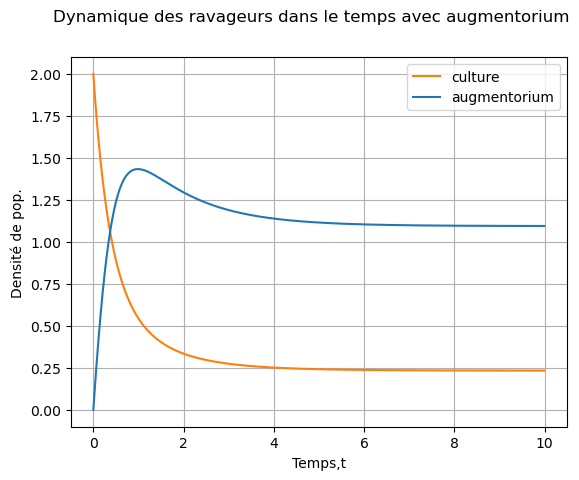

In [31]:
# Définition du modèle:
def aug(etat,t,param):
    rx,ry,Kx,Ky,b,gx,gy=param
    x,y=etat
    s=[rx*x*(1-x/Kx)+b*(y/gy-x/gx),ry*y*(1-y/Ky)+b*(x/gx-y/gy)]
    return s 

# Temps d'intégration:
ti = np.arange(0,10,0.01)

# Etats initiaux:
x0=2
y0=0
e0=[x0,y0]

# Paramètres: 

rx=0.5
ry=1
Kx=2
Ky=1
b=1
gx=0.5
gy=3

param_aug=np.array([rx,ry,Kx,Ky,b,gx,gy])

# Simulation:
s=odeint(aug,e0,ti,args=(param_aug,))

# Plot de la dynamique:
fig,ax=plt.subplots(1,1)
fig.suptitle('Dynamique des ravageurs dans le temps avec augmentorium')
ax.plot(ti,s[:,0],color='C1',label='culture')
ax.plot(ti,s[:,1],color='C0',label='augmentorium')

# Ajout d'élements:
ax.grid()
ax.legend()
ax.set_xlabel('Temps,t')
ax.set_ylabel('Densité de pop.')

On observe une hausse de la quantité de population dans l'augmentorium et une baisse de la population dans la culture.   
On voit qu'il se met en place un équilibre avec plus de population dans l'augmentorium que dans la culture.  
On observe que  on a la somme des équilibres qui est plus petite que celle des capacités et on a bien que la population de ravageurs dans la culture est plus basse que sa capacité.

### B) Plan de phase :

$$ 
\left\{\begin{array}{1}
\dot x = 0 \Leftrightarrow  y^*=\gamma_y\left(\frac{x}{\gamma_x}-\frac{r_xx}{\beta}\left(1-\frac{x}{K_x}\right)\right)\\
\dot y =0 \Leftrightarrow   x^*=\gamma_x\left(\frac{y}{\gamma_y}-\frac{r_yy}{\beta}\left(1-\frac{y}{K_y}\right)\right)
\end{array}\right.
$$

On voit tout de suite qu'on a deux paraboles qui se croisent en $(0,0)$ et en $(x^*,y^*)$. On va donc avoir deux équilibres, ceux ci vivent sur une ellipse de même équation qu'en 1). En effet, cette ellipse ne dépend d'aucun des paramètres de migration. En fonction des racines des polynômes on a des profils de paraboles différents : 

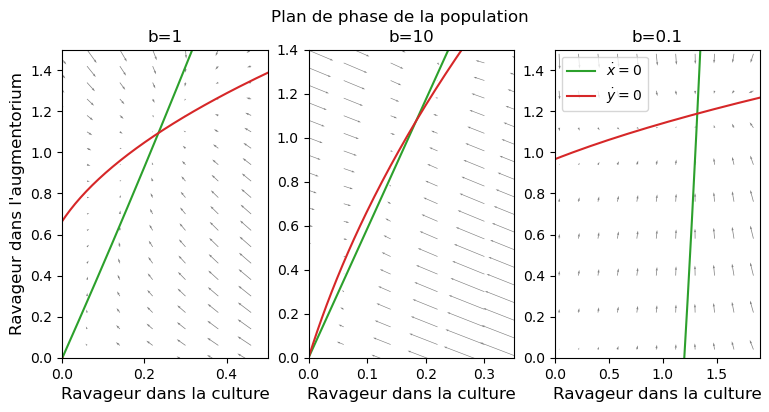

In [32]:
#On crée la figure avec les 3 sous figures:
fig2,(ax2,ax3,ax4)=plt.subplots(1,3,figsize=(9,4))
fig2.suptitle('Plan de phase de la population')
ax2.set_title('b=1')
ax3.set_title('b=10')
ax4.set_title('b=0.1')

#Plan de phase 1:#
# Paramètres: 
rx1=0.5
ry1=1
Kx1=2
Ky1=1
b1=1
gx1=0.5
gy1=3

param_aug1=np.array([rx1,ry1,Kx1,Ky1,b1,gx1,gy1])

# Isocline nulles:
xt=np.arange(0,10,0.01)
yt=np.arange(0,10,0.01)

#xdot = 0 
ax2.plot(xt,gy1*(xt/gx1-rx1*xt/b1*(1-xt/Kx1)),color='C2',label='xdot=0')

#ydot = 0
ax2.plot(gx1*(yt/gy1-ry1*yt/b1*(1-yt/Ky1)),yt,color='C3',label='ydot=0')

#Illustration de la figure:
ax2.set_xlim(left=0,right=0.5)
ax2.set_ylim(top=1.5,bottom=0)
ax2.set_xlabel('Ravageur dans la culture',fontsize='12')
ax2.set_ylabel('Ravageur dans l\'augmentorium',fontsize='12')

#Ajout du champ de vecteur
xg=np.arange(-0.5,3,0.08)
yg=np.arange(-0.5,3,0.08)
X,Y=np.meshgrid(xg,yg)

#On utilise quiver:
dx,dy=aug([X,Y],0,param_aug1)
ax2.quiver(X,Y,dx,dy,angles='xy',color='grey',scale=15,width=0.0035)

#Plan de phase 2:#
#Paramètres: 
rx2=0.5
ry2=1
Kx2=2
Ky2=1
b2=10
gx2=0.5
gy2=3

param_aug2=np.array([rx2,ry2,Kx2,Ky2,b2,gx2,gy2])  

#Isocline nulles:
#xdot = 0
ax3.plot(xt,gy2*(xt/gx2-rx2*xt/b2*(1-xt/Kx2)),color='C2',label='xdot=0')

#ydot = 0
ax3.plot(gx2*(yt/gy2-ry2*yt/b2*(1-yt/Ky2)),yt,color='C3',label='ydot=0')

#Illustration de la figure:
ax3.set_xlim(left=0,right=0.35)
ax3.set_ylim(top=1.4,bottom=0)
ax3.set_xlabel('Ravageur dans la culture',fontsize='12')


#Ajout du champ de vecteur
xg=np.arange(-0.5,3,0.08)
yg=np.arange(-0.5,3,0.08)
X,Y=np.meshgrid(xg,yg)

#On utilise quiver:
dx,dy=aug([X,Y],0,param_aug2)
ax3.quiver(X,Y,dx,dy,angles='xy',color='grey',scale=40,width=0.003)

#Plan de phase 3:
#Paramètres: 
rx3=0.5
ry3=1
Kx3=2
Ky3=1
b3=0.1
gx3=0.5
gy3=3

param_aug3=np.array([rx3,ry3,Kx3,Ky3,b3,gx3,gy3])

#Isocline nulles:
#xdot = 0 
ax4.plot(xt,gy3*(xt/gx3-rx3*xt/b3*(1-xt/Kx3)),color='C2',label='$\dot x=0$')

#ydot = 0 
ax4.plot(gx3*(yt/gy3-ry3*yt/b3*(1-yt/Ky3)),yt,color='C3',label='$\dot y=0$')

#Illustration:
ax4.set_xlim(left=0,right=1.9)
ax4.set_ylim(top=1.5,bottom=0)
ax4.set_xlabel('Ravageur dans la culture',fontsize='12')

# Ajout du champ de vecteur
xg=np.arange(-0.5,3,0.18)
yg=np.arange(-0.5,3,0.18)
X,Y=np.meshgrid(xg,yg)

dx,dy=aug([X,Y],0,param_aug3)
ax4.quiver(X,Y,dx,dy,angles='xy',color='grey',scale=10,width=0.0035)

#On légende:
ax4.legend()

On voit que $(0,0)$ est instable et $(x^*,y^*)$ est stable quelque soit la configuration (par le champ de vecteurs). Ceci montre que la population tend à se stabiliser entre l'augmentorium et l'extérieur. Dans ce modèle on a jamais disparition du ravageur.

On va calculer numériquement le point d'équilibre $(x^*,y^*)$ en considérant le croisement des paraboles verte et rouge, on obtient alors : 
$$
\frac{r_xr_y\gamma_x\gamma_y}{\beta}-\gamma_yr_y-\gamma_xr_x + y\left[\frac{r_y\gamma_y}{K_y}-\frac{r_xr_y\gamma_x\gamma_y}{\beta K_y} + \frac{r_xr_y^2\gamma_x^2\gamma_y}{\beta^2K_x}+\frac{r_x\gamma_x^2}{\gamma_yK_x}-\frac{2r_xr_y\gamma_x^2}{\beta K_x}   \right] + \frac{2r_yr_x\gamma_xy^2}{\beta K_xK_y}\left(1-\frac{r_y\gamma_y}{\beta}\right) + \frac{r_xr_y^2\gamma_x^2\gamma_yy^3}{\beta^2K_xK_y^2} = 0
$$

qu'on va résoudre par numpy.

Comme en 1) on trace le plan de phase complet avec l'ellipse, la droite de la somme des capacités et de la parabole $\dot x=0$ en $\beta=0$ et la parabole en $\beta=+\infty$. L'équilibre va se répartir sur l'ellipse entre les deux paraboles :  

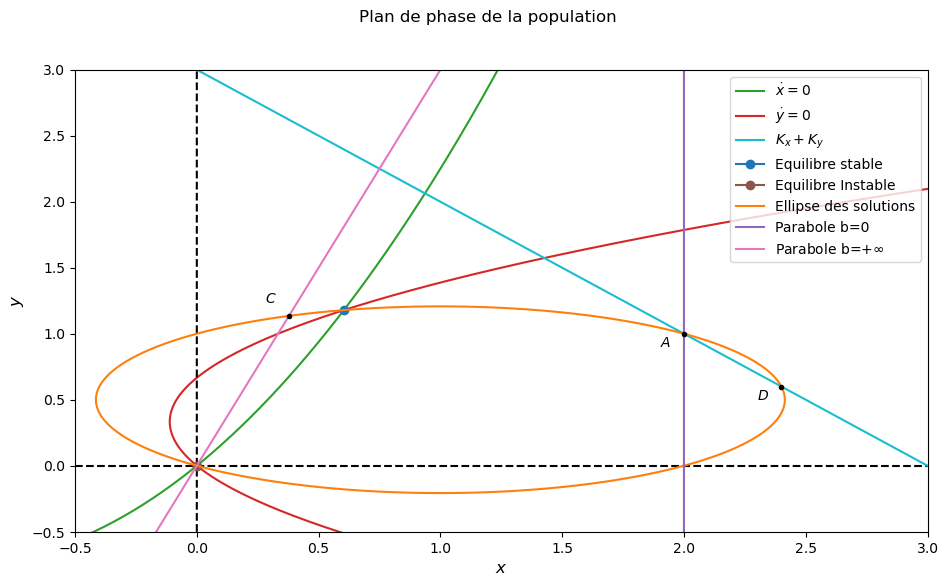

In [33]:
#On crée la figure:
fig2,ax2=plt.subplots(1,1,figsize=(11,6))
fig2.suptitle('Plan de phase de la population')

#Plan de phase 1:
# Paramètres: 
rx=0.5
ry=1
Kx=2
Ky=1
b=1
gx=1
gy=3

param_aug=np.array([rx,ry,Kx,Ky,b,gx,gy])

# Isocline nulles:
xt=np.arange(-10,10,0.01)
yt=np.arange(-10,10,0.01)

#xdot = 0 
ax2.plot(xt,gy*(xt/gx-rx*xt/b*(1-xt/Kx)),color='C2',label='$\dot x=0$')

#ydot = 0
ax2.plot(gx*(yt/gy-ry*yt/b*(1-yt/Ky)),yt,color='C3',label='$\dot y=0$')

#Cadrage:
ax2.set_xlim(left=-0.50,right=3)
ax2.set_ylim(top=3,bottom=-0.50)
ax2.set_xlabel('$x$',fontsize='12')
ax2.set_ylabel('$y$',fontsize='12')

#Axe x et y:
ax2.plot(xt,np.zeros_like(xt),color='k',linestyle='dashed')
ax2.plot(np.zeros_like(yt),yt,color='k',linestyle='dashed')

#Droite capacité:
x=np.arange(0,10,0.01)
ax2.plot(x,-x+Kx+Ky,label='$K_x+K_y$',color='C9')

#Points d'équilibres, utilisation de numpy : monome, polynome et racines:
#Calcul:
#Monome y
x=np.polynomial.Polynomial([0,1])

#Polynome :
pol = -gy*ry-gx*rx+(rx*ry*gx*gy)/b + x*((ry*gy)/(Ky*b)-(ry*rx*gy*gx)/(b*Ky) + rx*ry**2*gx**2*gy/(b**2*Kx)+rx*gx**2/(gy*Kx) - 2*rx*ry*gx**2/(b*Kx))+ (x**2)*2*(ry*rx*gx)/(b*Kx*Ky)*(1-ry*gy/b) + (x**3)*gy*rx*((ry*gx)**2)/(b**2*Kx*Ky**2)

#Solution
sol = pol.roots()[(np.isreal(pol.roots())) 
            *(pol.roots() > 0)]
yeq=sol[0].real

#Calcul de x avec sa définition:
xeq=gx*(yeq/gy-ry*yeq/b*(1-yeq/Ky))

#Plot des équilibres:
ax2.plot(xeq,yeq,label='Equilibre stable',marker='.',markersize=12)
ax2.plot(0,0,label='Equilibre Instable',marker='.',markersize=12,color='C5')

#Ellipse:
xg2=np.arange(-5,5,0.01)
yg2=np.arange(-5,5,0.01)
X2,Y2=np.meshgrid(xg2,yg2)

X=rx*X2*(1-X2/Kx)
Y=ry*Y2*(1-Y2/Ky)
ax2.contour(X2,Y2,(X+Y),[0],colors='C1')
ax2.plot(0,0,color='C1',label='Ellipse des solutions')

#Parabole xdot=0 b=0:
ax2.plot(Kx*np.ones_like(xt),xt,color='C4',label='Parabole b=0')

#Parabole xdot=0 b=+inf:
ax2.plot(xt,xt*gy/gx,color='C6',label='Parabole b=$+\infty$')

#A:
ax2.plot(Kx,Ky,color='black',marker='.')
ax2.text(Kx-0.1,Ky-0.1,'$A$')

#B:
ax2.plot(Kx,gy*Kx/gx,color='black',marker='.')

#C:
ax2.plot(((gx/gy)*rx+ry)/((gx/gy)*rx/Kx+(gy/gx)*ry/Ky),((gy/gx)*ry+rx)/((gx/gy)*rx/Kx+(gy/gx)*ry/Ky),color='black',marker='.')
ax2.text(((gx/gy)*rx+ry)/((gx/gy)*rx/Kx+(gy/gx)*ry/Ky)-0.1,((gy/gx)*ry+rx)/((gx/gy)*rx/Kx+(gy/gx)*ry/Ky)+0.1,'$C$')

#D:
ax2.plot(ry*Kx*(Kx+Ky)/(rx*Ky+ry*Kx),rx*Ky*(Kx+Ky)/(rx*Ky+ry*Kx),color='black',marker='.')
ax2.text(ry*Kx*(Kx+Ky)/(rx*Ky+ry*Kx)-0.1,rx*Ky*(Kx+Ky)/(rx*Ky+ry*Kx)-0.1,'$D$')

#Légende:
ax2.legend()

*⚠️* Tout ceci vaut pour $r_x<r_y$ ie on prend l'ellipse dans un seul sens (voir animation en D). Il n'y a pas de perte de génralité et les calculs pourraient être faits dans l'autre sens.

---
- Si on note $A$ l'intersection entre la parabole en $0$ et l'ellipse et $B$ l'intersection entre la parabole en $0$ et en $+\infty$ alors pour que $x^* < K_x$ (ce que l'on veut) il faut que la coordonnée en $y$ de $B$ soit supérieur à celle de $A$.

  Le point $A$ est défini par :
  $A=(K_x,K_y)$

  Le point $B$ est défini par :
  $B=\left(K_x,\frac{\gamma_yK_x}{\gamma_x}\right)$

  Autrement dit, **si** $\frac{\gamma_y}{\gamma_x}>\frac{K_y}{K_x}$ alors on a toujours l'augmentorium qui est efficace, ie le système est déflationiste quelque soit le taux de migration $\beta$.
  
  
---   
- Si on note $C$ l'intersection entre l'ellipse et la parabole en $+\infty$ on a alors la valeur de l'équilibre en $\beta =+\infty$.
  
  Le point $C$ est défini par :
  $C=\left(\frac{\left(\frac{\gamma_x}{\gamma_y}\right)r_x + r_y}{\left(\frac{\gamma_x}{\gamma_y}\right)\frac{r_x}{K_x}+\left(\frac{\gamma_y}{\gamma_x}\right)\frac{r_y}{K_y}} , \frac{\left(\frac{\gamma_y}{\gamma_x}\right)r_y + r_x}{\left(\frac{\gamma_x}{\gamma_y}\right)\frac{r_x}{K_x}+\left(\frac{\gamma_y}{\gamma_x}\right)\frac{r_y}{K_y}} \right)$
  
  Maintenant notons $D$ la valeur de l'intersection entre le droite des capacités et l'ellipse.
  
  Le point $D$ est défini par :
  $D=\left(\frac{r_yK_x(K_x+K_y)}{r_xK_y+r_yK_x} , \frac{r_xK_y(K_x+K_y)}{r_xKy+r_yK_x}\right) $  
  
  Ainsi, quand $\beta$ augmente le point d'équilibre se déplace entre A et C. On voit donc que l'équilibre peut soit être tout le   temps déflationiste si C est avant A (point précédent) sur l'ellipse soit être constamment inflationiste si C est entre A et D soit être les deux   si C est après D.
  
  Voyons ceci en terme de coefficient de droite, on a alors les exactes mêmes conditions mais sur les pentes des droites passant  par ces points, qu'on peut calculer.
  On a déja par le premier point la condition sur les paramètres pour avoir le système déflationiste.
  
  **Si** $\frac{\gamma_y}{\gamma_x} < \frac{r_xK_y}{r_yK_x}$ alors on a des équilibres à la fois inflationiste et déflationiste. En effet ceci traduit que C est après D, graphiquement on voit que l'équilibre est au début au dessus de la droite cyan et à la fin en dessous (après avoir passé D).  
  **Si** $\frac{r_xK_y}{r_yK_x} < \frac{\gamma_y}{\gamma_x} < \frac{K_y}{K_x}$ alors les équilibres sont constamment inflationiste. 

---

-  Enfin on observe que si la droite cyan est tangente à l'ellipse alors on a que le système est constamment déflationiste. Ceci correspond au même calcul que dans le 1) et on trouve que **si** $r_x=r_y$ le système est tout le temps déflationiste pour tout $\beta$.

#### Preuves mathématiques :

- Point $B$:  
  La première coordonnée est forcément $K_x$ car on considère le croisement avec la parabole en $\beta = 0$.  
  On sait que la parabole en $\beta = +\infty$ est définie par $y = \frac{\gamma_y}{\gamma_x}x$.  
  On a le résultat pour $x=K_x$.
  
- Point $C$:  
  La parabole en $\beta = +\infty$
 est définie par $y = \frac{\gamma_y}{\gamma_x}x$ et l'ellipse par $r_xx\left(1-\frac{x}   {K_x}\right) + r_yy\left(1-\frac{y}{K_y}\right) = 0 $. Il suffit de remplacer dans l'expression de l'ellipse la valeur de y donnée par la parabole pour trouver la première coordonnée.   
  Pour trouver la deuxième on utilise l'expression de la parabole.

- Point $D$:
  On fait la même que précédemment. La droite des capacités est définie par $y= -x +K_x+K_y$ qu'on remplace dans l'expression de l'ellipse pour trouver la première coordonnée (après simplifacation). La deuxième est déduite de la la première grâce à l'expression de la droite. 
  
Pour les conditions sur les équilibres on se rappelle que la pente de  la parabole en $\beta = +\infty$ est définie par $\frac{\gamma_y}{\gamma_x}$. Ainsi, quand cette pente est inférieure à celle de la droite passant par le point $D$ (qui a une pente de $\frac{r_xK_y}{r_yK_x}$) on a soit déflationiste soit inflationiste. On a donc pour condition $\frac{\gamma_y}{\gamma_x} < \frac{r_xK_y}{r_yK_x}$.  
Ensuite pour que le système soit entièrement inflationiste on veut que la pente de $\beta = +\infty$ soit entre celle de la droite passant par $D$ et celle passant par $A$ (première condition détaillée au premier point de l'analyse. Ceci donne le résultat.


### C) Illustration des propositions et applications théorique à l'augmentorium :

#### a) Illustration

---

On va tracer la somme des équilibres en fonction de $\beta$, ceci permet de voir, en tracant $K_x+K_y$, pour quelle migration le système est déflationiste. On teste les conditions sur les paramètres trouvées en B.

Text(0.5, 1.0, 'Inflation')

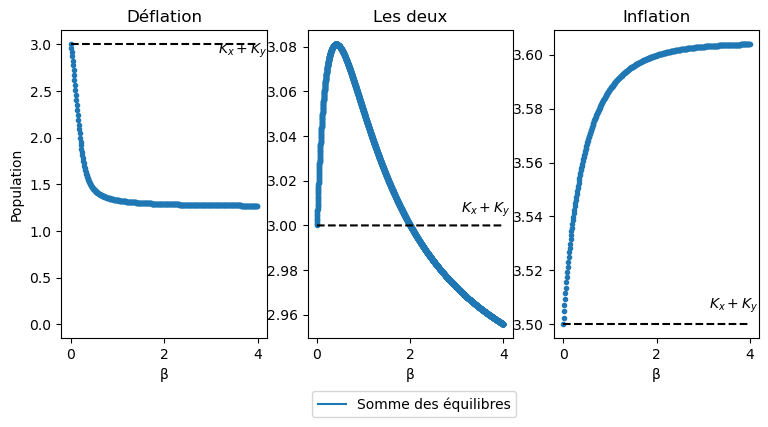

In [40]:
#Définition d'une fonction qui prend en compte le changement de migration:
def aug2(etat,t,param,h):
    rx,ry,Kx,Ky,gx,gy=param
    b=h
    x,y=etat
    s=[rx*x*(1-x/Kx)+b*(y/gy-x/gx),ry*y*(1-y/Ky)+b*(x/gx-y/gy)]
    return s 

#Définition des paramètres:
#1:
rx1 = 0.5
ry1 = 1
Kx1 = 2
Ky1 = 1
gx1 = 0.5
gy1 = 3

param1=np.array([rx1,ry1,Kx1,Ky1,gx1,gy1])

#2:
rx2 = 0.5
ry2 = 1
Kx2 = 2
Ky2 = 1
gx2 = 5
gy2 = 1

param2=np.array([rx2,ry2,Kx2,Ky2,gx2,gy2])

#3:
rx3 = 1
ry3 = 2
Kx3 = 2
Ky3 = 1.5
gx3 = 2
gy3 = 1

param3=np.array([rx3,ry3,Kx3,Ky3,gx3,gy3])

#Temps d'intégration suffisament large pour atteindre l'équilibre:
t=np.arange(0,100,0.01)

#Condition initiale:
e0=[1,1]

#Figure:
fig,(ax,ax1,ax2)=plt.subplots(1,3,figsize=(9,4))

#Boucle pour plot en fonction de beta:
for i in np.arange(0,4,0.01):
    s=odeint(aug2,e0,t,args=(param1,i)) #On calcule pour chaque beta l'équilibre
    ax.plot(i,s[-1][0]+s[-1][1],marker='.',color='C0') #On plot un point qui correspond à la valeur de la somme des éq. en fonction de beta
    s2=odeint(aug2,e0,t,args=(param3,i))
    ax2.plot(i,s2[-1][0]+s2[-1][1],marker='.',color='C0')
    
for i in np.arange(0,4,0.001):
    s1=odeint(aug2,e0,t,args=(param2,i))
    ax1.plot(i,s1[-1][0]+s1[-1][1],marker='.',color='C0')

#Plot de la droite Kx+Ky:    
xt=np.arange(0,4,0.01)
xt2=np.arange(0,4,0.001)

ax.plot(xt,(Kx1+Ky1)*np.ones_like(xt),linestyle='dashed',color='k',markersize='6')
ax.text(3.15,Kx1+Ky1-0.1,'$K_x+K_y$')
ax1.plot(xt2,(Kx2+Ky2)*np.ones_like(xt2),linestyle='dashed',color='k',markersize='6')
ax1.text(3.10,Kx2+Ky2+0.006,'$K_x+K_y$')
ax2.plot(xt,(Kx3+Ky3)*np.ones_like(xt),linestyle='dashed',color='k',markersize='6')
ax2.text(3.12,Kx3+Ky3+0.006,'$K_x+K_y$')

#Légendes:
ax.set_xlabel('β')
ax1.set_xlabel('β')
ax2.set_xlabel('β')
ax.set_ylabel('Population')
ax.plot(0,0,color='C0',label='Somme des équilibres')

#On déplace la légende hors de la figure:
ax.legend(bbox_to_anchor=(1.75, -0.65, 0.5, 0.5))

#Titres:
ax.set_title('Déflation')
ax1.set_title('Les deux')
ax2.set_title('Inflation')

On a donc bien les trois situations en fonction des paramètres qu'on choisit.

---

#### b) Applications théoriques à l'augmentorium:

---

L'augmentorium est basé sur l'assymétrie de la migration, les fuites (migration de l'augmentorium vers la culutre) doivent êtres empêchées pour maximiser la performance. On peut modéliser la somme des équilibres et l'équilibre dans la culutre seule en fonction de ce taux de fuite pour avoir une preuve mathématique.  
Les petites valeurs $\gamma_y$ correspondent à une forte fuite et inversement.  

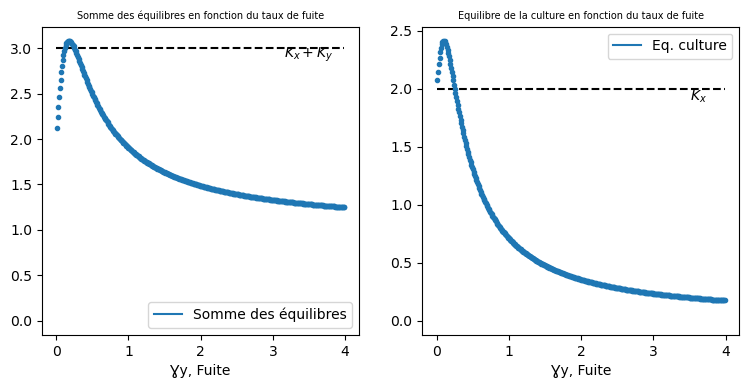

In [41]:
#Définition d'un nouveau modèle qui prend en compte le changement de gy:
def aug3(etat,t,param,h):
    rx,ry,Kx,Ky,gx,b=param
    gy=h
    x,y=etat
    s=[rx*x*(1-x/Kx)+b*(y/gy-x/gx),ry*y*(1-y/Ky)+b*(x/gx-y/gy)]
    return s 

#Définition des paramètres:
#1:
rx1 = 0.5
ry1 = 1
Kx1 = 2
Ky1 = 1
gx1 = 0.5
b = 1

param1=np.array([rx1,ry1,Kx1,Ky1,gx1,b])

#Temps d'intégration assez large pour atteindre l'éq :
t=np.arange(0,100,0.01)

#Conditions initiales:
e0=[1,1]

#Figure:
fig,(ax,ax1)=plt.subplots(1,2,figsize=(9,4))

#Droite de la somme des capacités:
xt=np.arange(0,4,0.01)

ax.plot(xt,(Kx1+Ky1)*np.ones_like(xt),linestyle='dashed',color='k',markersize='6')
ax.text(3.15,Kx1+Ky1-0.1,'$K_x+K_y$')

ax1.plot(xt,Kx1*np.ones_like(xt),linestyle='dashed',color='k',markersize='6')
ax1.text(3.5,Kx1-0.1,'$K_x$')

#Boucle qui calcule l'équilibre et qui plot un point en fonction des valeurs du taux de fuite:
for i in np.arange(0.01,4,0.01):
    s=odeint(aug3,e0,t,args=(param1,i))
    ax.plot(i,s[-1][0]+s[-1][1],marker='.',color='C0')
    ax1.plot(i,s[-1][0],marker='.',color='C0')

#Légendes:
ax1.set_xlabel('Ɣy, Fuite')
ax.set_xlabel('Ɣy, Fuite')
ax.plot(0,0,color='C0',label='Somme des équilibres')
ax1.plot(0,0,color='C0',label='Eq. culture')

ax.set_title('Somme des équilibres en fonction du taux de fuite',fontsize=7)
ax1.set_title('Equilibre de la culture en fonction du taux de fuite',fontsize=7)   
ax.legend()
ax1.legend()

On peut avoir l'impression que d'après la première figure une forte fuite est bénéfique dans notre cas mais en tracant l'équilibre dans la culture en fonction de la fuite on se rend compte que une forte fuite induit un surnombre de ravageurs dans la culture.  
Ainsi, dans le cas de l'augmentorium il est important de considérer l'équilibre de la culture seule. 
A creuser


---

Si on considère une situtation d'augmentorium on a $r_x<r_y$ et $\gamma_x << \gamma_y$. En fonction des cultures on pourra avoir des rapport de capacités différentes :

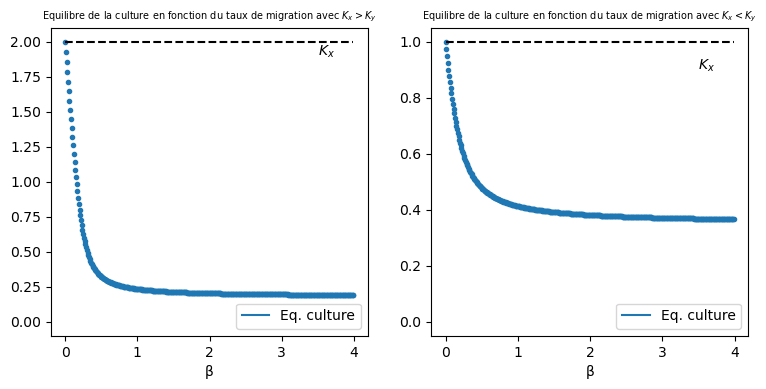

In [42]:
#Figure:
fig,(ax,ax1)=plt.subplots(1,2,figsize=(9,4))
ax.set_title('Equilibre de la culture en fonction du taux de migration avec $K_x>K_y$',fontsize=7)
ax1.set_title('Equilibre de la culture en fonction du taux de migration avec $K_x<K_y$',fontsize=7)  

#Fonction qui prend en compte l'actualisation de beta:
def aug4(etat,t,param,h):
    rx,ry,Kx,Ky,gx,gy=param
    b=h
    x,y=etat
    s=[rx*x*(1-x/Kx)+b*(y/gy-x/gx),ry*y*(1-y/Ky)+b*(x/gx-y/gy)]
    return s 

#Définition des paramètres:
#1:
rx1 = 0.5
ry1 = 1
Kx1 = 2
Ky1 = 1
gx1 = 0.5
gy1 = 3

param1=np.array([rx1,ry1,Kx1,Ky1,gx1,gy1])

#2:
rx2 = 0.5
ry2 = 1
Kx2 = 1
Ky2 = 2
gx2 = 0.5
gy2 = 3

param2=np.array([rx2,ry2,Kx2,Ky2,gx2,gy2])

#Temps d'intégration:
t=np.arange(0,100,0.01)

#Conditions initiales:
e0=[1,1]

#Boucle en fonction de beta
for i in np.arange(0,4,0.01):
    s=odeint(aug4,e0,t,args=(param1,i))
    ax.plot(i,s[-1][0],marker='.',color='C0')
    s1=odeint(aug4,e0,t,args=(param2,i))
    ax1.plot(i,s1[-1][0],marker='.',color='C0')

#Droite Kx:
xt=np.arange(0,4,0.01)
ax.plot(xt,Kx1*np.ones_like(xt),linestyle='dashed',color='k',markersize='6')
ax.text(3.5,Kx1-0.1,'$K_x$')

ax1.plot(xt,Kx2*np.ones_like(xt),linestyle='dashed',color='k',markersize='6')
ax1.text(3.5,Kx2-0.1,'$K_x$')


#Légendes:
ax.set_xlabel('β')
ax1.set_xlabel('β')
ax.plot(0,0,color='C0',label='Eq. culture')
ax1.plot(0,0,color='C0',label='Eq. culture')

ax.legend()
ax1.legend()

On observe donc que quelque soit le type de culture, ce modèle nous dit que l'augmentorium est toujours efficace car on a toujours l'équilibre dans la culture qui est inférieur à la capacité totale de la culture et ce quelque soit le taux de migration.

---

### D) Animation : 

Petite animation Geogebra pour bien voir en fonction de $\beta$ que l'équilibre vit sur l'ellipse et pour tester les différentes propositions.

In [67]:
import IPython.display as display
fig01 = """
<iframe width="800" height="600" src="https://www.geogebra.org/classic/bhhpgtqv" style="border: 1px solid black"></iframe>
"""
display.HTML(fig01)

### E) Conclusion :

Ce modèle d'augmentorium avec pour hypothèse que le taux de croissance est supérieur dans l'augmentorium (biologiquement logique) permet d'apporter quelques perspectives.  

En effet, l'augmentorium impose la condition que $\gamma_x << \gamma_y$ et donc que $\frac{\gamma_y}{\gamma_x}>>1$. De plus la capacité K entre l'augmentorium et la culture diffère en fonction des types de cultures mais reste généralement proche entre les deux. Ainsi le rapport entre ces deux capacités est proche de 1 que ce soit inférieurement ou supérieurement. On a donc en permanence dans les cultures la condition $\frac{\gamma_y}{\gamma_x}>\frac{K_y}{K_x}$ ce qui implique une déflation de la somme des équilibres par rapport à la capacité totale. On a, de plus, vu que l'équilibre des cultures est tout le temps sous la capactié $K_x$.

Donc mathématiquement l'augmentorium semble efficace. Mais ce modèle omet un aspect important : les prédateurs des parasites, qui eux circulent librement et forment deux populations et imposent une mortalité aux ravageurs à la fois dans l'augmentorium et dans la culture.  
  
On va donc, en 3), établir un modèle qui prend en compte les parasites.

## 3) **Modèle complet de l'augmentorium :** 

### A) Définition du modèle :

Pour simuler on va partir du modèle suivant : 
$$ \left\{\begin{array}{1}
\dot x = r_xx\left(1-\frac{x}{K_x}\right)+\beta\left(\frac{y}{\gamma_y}-\frac{x}{\gamma_x}\right)-pxz \\
\dot y = r_yy\left(1-\frac{y}{K_y}\right)+\beta\left(\frac{x}{\gamma_x}-\frac{y}{\gamma_y}\right)-pyz \\
\dot z = z\left(n(x+y) - m\right)
\end{array}\right.
$$

avec:  
- $r_x$ le taux de croissance de x dans la culture,  
- $r_y$ le taux de croissance de y dans l'augmentorium,  
- $K_x$ la capacité maximale de la culture,  
- $K_y$ la capacité maximale de l'augmentorium,  
- $\beta$ la force de migration,  
- $\gamma_x$ le taux d'assymétrie de la migration culture vers augmentorium,  
- $\gamma_y$ le taux d'assymétrie de la migration augmentorium vers culture,  
- $p$ la prédation de $z$ sur $x$ ou $y$,
- $n$ le taux de conversion proie prédateur (naissance due à la prédation),  
- $m$ la mortalité des prédateurs $z$.

#### Justification du modèle et quelques hypothèses:

*On s'appuie sur un modèle inspiré par [Freedman et Waltman](http://dx.doi.org/10.1137/0132052) dans leur article de 1977.*  
  
C'est plus généralement un modèle à deux structures, la culture (x) et l'augmentorium (y) où les proies grandissent selon une croissance logistique et les prédateurs une réponse fonctionelle de type 1. On suppose que les prédateurs diffusent librement entre la culture et l'augmentorium (très proche de la [réalité](https://unt.univ-reunion.fr/fileadmin/Fichiers/UNT/UVED/IGAR/EN/00_chapitre_3_gen_caseWeb/res/8a.pdf)) d'où la considération d'une seule population.  

La migration est assymétrique entre la culture et l'augmentorium, plus forte de la culutre vers l'augmentorium donc $\gamma_x < \gamma_y$.  
On supposera que le taux de croissance dans la culture est plus faible que dans l'augmentorium, donc $r_x<r_y$, car l'environnement de l'augmentorium est bénéfique à la reproduction des ravageur (chaleur,isolation,fruit disponible, fruits pourris).  

Le rapport entre la capacité de la culture et de l'augmentorium peut être différent en fonction du type de culture dans lequel on se place. En effet si la culture est remontante ie qu'elle produit tout au long de l'année, les apports de fruits dans l'augmentorium ne seront jamais excessifs par rapport au nombre de fruits à l'extérieur, impliquant une capacité maximale plus forte pour la culture ($K_x>K_y$). Par contre si la culture est non-remontante on aura énormément de fruits dans l'augmentorium sur une courte période impliquant une possible capacité maximale plus forte pour l'augmentorium ($K_x<K_y$).

Dans la suite on se placera dans une situation avec $K_x<K_y$.

On considère dans un premier temps que la prédation et les naissances sont égales entres les structures. Dans en second temps (en 4)) nous verrons l'analyse en prenant en compte ces paramètres.

### B) Dynamique :

Text(0.5, 1.0, 'Disparition des parasites, maintien des ravageurs')

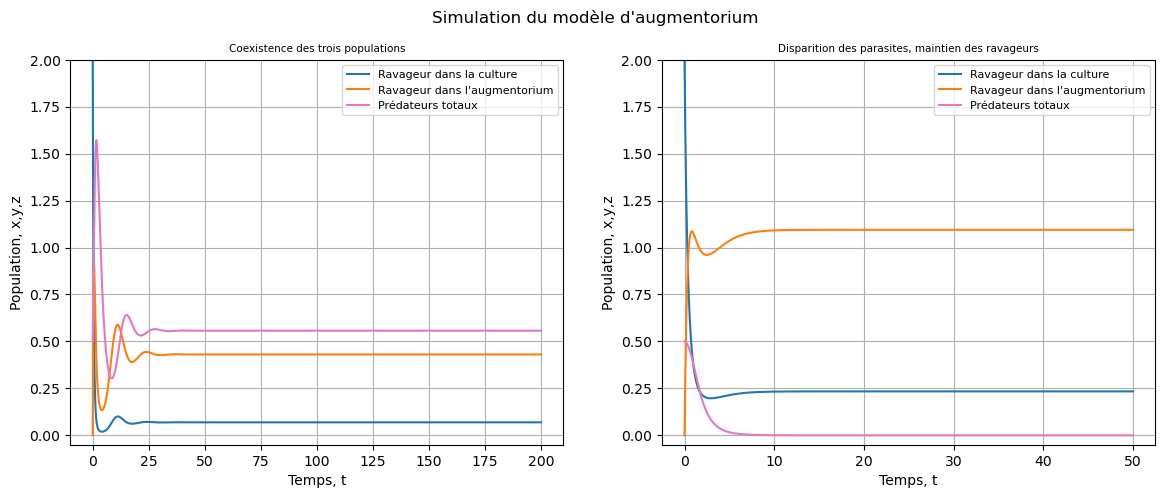

In [50]:
#Définition du modèle:
def a(etat,t,param):
    x,y,z=etat
    rx,Kx,ry,Ky,gx,gy,b,p,n,m = param
    xdot,ydot,zdot=[rx*x*(1-x/Kx)+b*(y/gy-x/gx)-p*z*x,ry*y*(1-y/Ky)+b*(x/gx-y/gy)-p*y*z,z*(n*(x+y)-m)]
    return [xdot,ydot,zdot]

#Paramètres Simulation 1: 
rx1=0.5
ry1=1
Kx1=2
Ky1=1
gx1=0.5
gy1=3
b1=1
p1=1
n1=1
m1=0.5

param_a1=np.array([rx1,Kx1,ry1,Ky1,gx1,gy1,b1,p1,n1,m1])

#Paramètres Simulation 2: 
rx2=0.5
ry2=1
Kx2=2
Ky2=1
gx2=0.5
gy2=3
b2=1
p2=1
n2=1
m2=2

param_a2=np.array([rx2,Kx2,ry2,Ky2,gx2,gy2,b2,p2,n2,m2])

#Temps d'intégration 1,2:
t1=np.arange(0,200,0.01)
t2=np.arange(0,50,0.01)

#Condition initiale de 1,2:
x0=2
y0=0
z0=0.5
c0=np.array([x0,y0,z0])

#Simulation 1,2:
s1=odeint(a,c0,t1,args=(param_a1,))
s2=odeint(a,c0,t2,args=(param_a2,))

#Plot de la figure: 
fig,ax = plt.subplots(1,2,figsize=(14,5))
fig.suptitle('Simulation du modèle d\'augmentorium')
plt.subplots_adjust(hspace=0.4)

#Plot de l'axe 1:
ax[0].plot(t1,s1[:,0],color='C0',label='Ravageur dans la culture')
ax[0].plot(t1,s1[:,1],color='C1',label='Ravageur dans l\'augmentorium')
ax[0].plot(t1,s1[:,2],color='C6',label='Prédateurs totaux')

#Plot de l'axe 2:
ax[1].plot(t2,s2[:,0],color='C0',label='Ravageur dans la culture')
ax[1].plot(t2,s2[:,1],color='C1',label='Ravageur dans l\'augmentorium')
ax[1].plot(t2,s2[:,2],color='C6',label='Prédateurs totaux')


#Légendes et titres:
ax[0].set_ylabel('Population, x,y,z')
ax[0].legend(fontsize=8)
ax[0].grid()
ax[0].set_xlabel('Temps, t')
ax[0].set_ylim(top=2,bottom=-0.05)
ax[0].set_title('Coexistence des trois populations',fontsize=7.5)

ax[1].set_xlabel('Temps, t')
ax[1].set_ylabel('Population, x,y,z')
ax[1].legend(fontsize=8)
ax[1].grid()
ax[1].set_ylim(top=2,bottom=-0.05)

ax[1].set_title('Disparition des parasites, maintien des ravageurs',fontsize=7.5)

On a utilisé des paramètres différents pour obtenir ces simulations. A gauche on a un taux de mortalité $m = 0.5$ et à droite on a un taux de mortalité $m = 2$. Ainsi, on a logiquement une extinction des prédateurs à droite car leurs taux de mortalité est trop fort.  
Ce système semble donc avoir deux situtations (avec ou sans parasites) avec à chaque fois deux équilibres.   
Le système à gauche se stabilise avec peu de population dans la culture et un fort taux de parasites. On voit que le système à droite est équivalent à la dynamique de celui en 2).

### C) Plan de phase :

On trace les surfaces correspondant à $\dot x = 0  ;  \dot y = 0  ; \dot z = 0$, quand $\dot z = 0 $ on a soit le plan $z=0$ soit le plan $y=\frac{m}{n}-x$ (si $z \ne 0$).   
On a donc mis en valeur en vert l'intersection de la surface définie par $\dot x =0$ avec les deux plans précédents.  
On a aussi tracé en rouge l'intersection de la surface définie par $\dot y = 0$ avec les deux plans cités précedemment. Ainsi les croisements entre les courbes vertes et rouges sont exactement les points d'équilibres.    
On observe ainsi que graphiquement il n'existe que trois équilibres au maximum.

In [25]:
import IPython.display as display
fig01 = """
<iframe width="1300" height="600" src="https://www.geogebra.org/3d/ngsqrv9v" style="border: 1px solid black"></iframe>
"""
display.HTML(fig01)

En modifiant les paramètres ($m$ ou $n$) on remarque que l'équilibre avec extinction des prédateurs est atteint lorsque celui où il n'y a pas disparition des prédateurs le rejoint en z=0.  
Ainsi, pour trouver une condition sur l'extinction du prédateur il suffit de poser $z^*_2 = 0$ dans la valeur de l'équilibre quand $z\ne0$.  

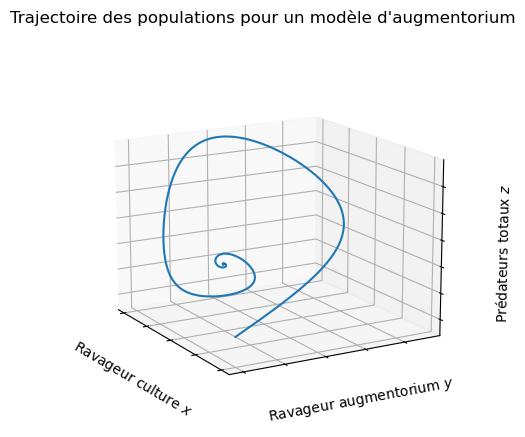

In [51]:
#Figure:
fig,ax=plt.subplots(1,1,subplot_kw={"projection": "3d"})

#On trace la trajectoire:
ax.plot(s1[:,0],s1[:,1],s1[:,2])
ax.view_init(elev=15, azim= 330)

#Legendes et titres:
ax.set_xlabel('Ravageur culture $x$', fontsize='10')
ax.set_ylabel('Ravageur augmentorium $y$', fontsize='10')
ax.set_zlabel('Prédateurs totaux $z$', fontsize='10')

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])

fig.suptitle("Trajectoire des populations pour un modèle d'augmentorium", 
            va='top', fontsize='12');

### D) Equilibres

On résout le système suivant : 

$$ 
\left\{\begin{array}{1}
0 = r_xx\left(1-\frac{x}{K_x}\right)+\beta\left(\frac{y}{\gamma_y}-\frac{x}{\gamma_x}\right)-pxz \\
0 = r_yy\left(1-\frac{y}{K_y}\right)+\beta\left(\frac{x}{\gamma_x}-\frac{y}{\gamma_y}\right)-pyz \\
0 = z\left(n(x+y) - m\right)
\end{array}\right.
$$

- Si $z^*$=0: 
  On reprend l'analyse de [Arditi et al](https://doi.org/10.1016/j.tpb.2017.12.006) de 2017.
  Ceci donne l'équilibre trivial $(0,0,0)$ (extinction des deux populations) et $(x_1^*,y_1^*,0)$ (disparition des parasites) où $x_1^*$ et $y_1^*$ sont les solutions de l'équilibre en 2) (qu'on peut calculer avec numpy).
- Si $z^*\neq 0$:  
  Il existe un équilibre $(x_2^*,y_2^*,z_2^*)$ (co-existence parasite-ravageur). On va le calculer pour différentes valeurs du taux de migration.

#### **I) Calcul des équilibres :**

On va suivre la méthode de [Freedman et Waltman](https://epubs.siam.org/doi/10.1137/0132052) pour trouver les valeurs des équilibres $(x_2^*,y_2^*,z_2^*)$ pour $\beta$ petit.

##### a) Pour $\beta = 0$ :

Le système (1) devient : 
$$ 
\left\{\begin{array}{1}
0 = r_xx^*_2\left(1-\frac{x^*_2}{K_x}\right)-px^*_2z^*_2\\
0 = r_yy^*_2 \left(1-\frac{y^*_2 }{K_y}\right)-py^*_2 z^*_2 \\
0 = z^*_2\left(n(x^*_2+y^*_2 ) - m\right)
\end{array}\right. \\  
$$

On a ainsi : 
$$
\left\{\begin{array}{1}
x^*_2 =  \frac{K_x\left(r_ym+r_xnK_y-r_ynK_y\right)}{n\left(r_yK_x+r_xK_y\right)}\\
y^*_2 = \frac{K_y\left(r_xm+r_ynK_x-r_xnK_x\right)}{n\left(r_yK_x+r_xK_y\right)}\\
z^*_2 = \frac{r_xr_y\left(nK_x+nK_y-m\right)}{pn\left(r_xK_y+r_yK_x\right)}
\end{array}\right. \\
$$

Il faut que ces équilibres soient positifs, on peut donc en déduire les conditions suivantes sur le système : 
$$-\frac{mr_y}{nK_y}<r_x-r_y<\frac{mr_x}{nK_x}$$
et
$$ K_x+K_y>\frac{m}{n}$$

et si on a égalité de la dernière inégalité on a alors z = 0 et on passe sur l'équilibre $(x_1^*,y_1^*,0)$ avec : 

$$
\left\{\begin{array}{1}
x^*_1 = K_x\\
y^*_1 = K_y\\
z^*_1 = 0
\end{array}\right. \\
$$

qu'on obtient soit en prenant en compte que $K_x = \frac{m}{n} - K_y$ soit en posant z=0 dans (1) et en observant qu'on est face à une croissance logistique.

###### Preuve mathématique :

$$ 
\left\{\begin{array}{1}
0 = r_xx^*_2\left(1-\frac{x^*_2}{K_x}\right)-px^*_2z^*_2\\
0 = r_yy^*_2 \left(1-\frac{y^*_2 }{K_y}\right)-py^*_2 z^*_2 \\
0 = z^*_2\left(n(x^*_2+y^*_2 ) - m\right)
\end{array}\right. \\  
$$
$$
\Leftrightarrow
$$
$$
\left\{\begin{array}{1}
z^*_2 = \frac{r_x}{p}\left(1-\frac{x^*_2}{K_x}\right) \\
z^*_2 = \frac{r_y}{p}\left(1-\frac{y^*_2 }{K_y}\right) \\
x^*_2+y^*_2  =  \frac{m}{n}
\end{array}\right. \\
$$
$$
\Leftrightarrow
$$
$$
\left\{\begin{array}{1}
0 = rx-\frac{r_xm}{nK_x}+\frac{r_xy^*_2 }{K_x}-ry+\frac{r_yy^*_2 }{K_y} \\
x^*_2 =  \frac{m}{n} - y^*_2 
\end{array}\right. \\
$$
$$
\Leftrightarrow
$$
$$
\left\{\begin{array}{1}
y^*_2  = \left(r_y-r_x+\frac{r_xm}{nK_x}\right)\frac{1}{\left(\frac{r_x}{K_x}+\frac{r_y}{K_y}\right)} \\
x^*_2 =  \frac{m}{n} - y^*_2 
\end{array}\right. \\
$$
$$
\Leftrightarrow
$$
$$
\left\{\begin{array}{1}
y^*_2  = \frac{K_y\left(r_xm+r_ynK_x-r_xnK_x\right)}{n\left(K_x+K_y\right)}\\
x^*_2 =  \frac{m}{n} - y^*_2 
\end{array}\right. \\
$$
$$
\Leftrightarrow
$$
$$
\left\{\begin{array}{1}
y^*_2 = \frac{K_y\left(r_xm+r_ynK_x-r_xnK_x\right)}{n\left(r_yK_x+r_xK_y\right)}\\
x^*_2 =  \frac{K_x\left(r_ym+r_xnK_y-r_ynK_y\right)}{n\left(r_yK_x+r_xK_y\right)}
\end{array}\right. \\
$$
et donc : 
$$
z^*_2 = \frac{r_x}{p}\left(1-\frac{x^*_2}{K_x}\right)
$$
$$
\Leftrightarrow
$$
$$
z^*_2 = \frac{r_xr_y\left(nK_x+nK_y-m\right)}{pn\left(r_xK_y+r_yK_x\right)}
$$

##### b) Pour $\beta > 0$ et petit : 

Pour $\beta$ petit on va utiliser l'égalité de Taylor pour trouver $(x_2^*,y_2^*,z_2^*)$. On a alors si on note $(x_2^*(\beta),y_2^*(\beta),z_2^*(\beta))$:

$$
\left\{\begin{array}{1}
x^*_2(0) =  \frac{K_x\left(r_ym+r_xnK_y-r_ynK_y\right)}{n\left(r_yK_x+r_xK_y\right)}\\
y^*_2(0) = \frac{K_y\left(r_xm+r_ynK_x-r_xnK_x\right)}{n\left(r_yK_x+r_xK_y\right)}\\
z^*_2(0) = \frac{r_xr_y\left(nK_x+nK_y-m\right)}{pn\left(r_xK_y+r_yK_x\right)}
\end{array}\right. \\
$$
et on a les formules suivantes pour calculer les équilibres,
$$
\left\{\begin{array}{1}
x^*_2(\beta) = x^*_2(0) + \frac{\beta K_xK_y\left(\frac{y^*_2(0)}{\gamma_y}-\frac{x^*_2(0)}{\gamma_x}\right)\left(\frac{1}{x^*_2(0)}+\frac{1}{y^*_2(0)}\right)}{K_yr_x + K_xr_y} + o(\beta)\\
y^*_2(\beta) = y^*_2(0) + \frac{\beta K_xK_y\left(\frac{y^*_2(0)}{\gamma_y}-\frac{x^*_2(0)}{\gamma_x}\right)\left(\frac{1}{x^*_2(0)}+\frac{1}{y^*_2(0)}\right)}{K_yr_x + K_xr_y} + o(\beta)\\
z^*_2(\beta) = z^*_2(0) + \frac{\beta K_xK_y\left(\frac{y^*_2(0)}{\gamma_y}-\frac{x^*_2(0)}{\gamma_x}\right)\left(\frac{r_y}{x^*_2(0)K_y}-\frac{r_x}{y^*_2(0)K_x}\right)}{p\left(K_yr_x + K_xr_y\right)} + o(\beta)
\end{array}\right. \\
$$
qu'on peut reécrire : 
$$
\left\{\begin{array}{1}
x^*_2(\beta) = \frac{K_x\left(\beta K_y\left(\frac{y^*_2(0)}{\gamma_y}-\frac{x^*_2(0)}{\gamma_x}\right)\left(\frac{1}{x^*_2(0)}+\frac{1}{y^*_2(0)}\right)\left(\frac{r_x}{\beta}-\frac{r_y}{\beta}\right)+\frac{r_ym}{n}\right)}{K_yr_x + K_xr_y} + o(\beta)\\
y^*_2(\beta) =\frac{K_y\left(\beta K_x\left(\frac{y^*_2(0)}{\gamma_y}-\frac{x^*_2(0)}{\gamma_x}\right)\left(\frac{1}{x^*_2(0)}+\frac{1}{y^*_2(0)}\right)\left(\frac{r_y}{\beta}-\frac{r_x}{\beta}\right)+\frac{r_xm}{n}\right)}{K_yr_x + K_xr_y} + o(\beta)\\
z^*_2(\beta) =\frac{r_xr_y\left(K_x+K_y-\frac{m}{n}\right) + \beta K_xK_y\left(\frac{y^*_2(0)}{\gamma_y}-\frac{x^*_2(0)}{\gamma_x}\right)\left(\frac{r_y}{x^*_2(0)K_y}-\frac{r_x}{y^*_2(0)K_x}\right)}{p\left(K_yr_x + K_xr_y\right)} + o(\beta)
\end{array}\right. \\
$$

###### Preuve mathématique :

Soit $\mathbb{F(x,y,z,\beta)}$ tel que :
$$
\mathbb{F(x,y,z,\beta)} = \left\{\begin{array}{1}
r_xx\left(1-\frac{x}{K_x}\right)+\beta\left(\frac{y}{\gamma_y}-\frac{x}{\gamma_x}\right)-pxz \\
r_yy\left(1-\frac{y}{K_y}\right)+\beta\left(\frac{x}{\gamma_x}-\frac{y}{\gamma_y}\right)-pyz \\
z\left(n(x+y) - m\right)
\end{array}\right. \\
$$
On veut ainsi résoudre : 
$$ 
\mathbb{F\left(\mathcal{x}_2^*(\beta) , \mathcal{y}_2^*(\beta) , \mathcal{z}_2^*(\beta) , \beta\right)}=0
$$
or, d'après la formule de Taylor on a à l'ordre 1 en dimension 3 on a : 
$$
\mathbb{F\left(\mathcal{x}_2^*(\beta) , \mathcal{y}_2^*(\beta) , \mathcal{z}_2^*(\beta) , \beta\right)}=\mathbb{F\left(\mathcal{x}_2^*(\mathcal{0}) , \mathcal{y}_2^*(\mathcal{0}) , \mathcal{z}_2^*(\mathcal{0}) , \mathcal{0}\right)} +  \frac{\partial \mathbb{F}}{\partial \beta}\left(\mathcal{x}_2^*(\mathcal{0}) , \mathcal{y}_2^*(\mathcal{0}) , \mathcal{z}_2^*(\mathcal{0}) , \mathcal{0}\right)\beta + \mathbb{J}\tiny{\mathbb{F\left(\mathcal{x}_2^*(\mathcal{0}) , \mathcal{y}_2^*(\mathcal{0}) , \mathcal{z}_2^*(\mathcal{0}) ,\mathcal{0}\right)}}\small\begin{pmatrix} \mathcal{x}_2^*(\beta) - \mathcal{x}_2^*(\mathcal{0}) \\ \mathcal{y}_2^*(\beta) - \mathcal{y}_2^*(\mathcal{0}) \\ \mathcal{z}_2^*(\beta) - \mathcal{z}_2^*(\mathcal{0}) \end{pmatrix} + o(\beta)
$$
$$
\Leftrightarrow$$
$$
\begin{pmatrix} \mathcal{x}_2^*(\beta) \\ \mathcal{y}_2^*(\beta) \\ \mathcal{z}_2^*(\beta) \end{pmatrix} = 
\begin{pmatrix} \mathcal{x}_2^*(\mathcal{0}) \\  \mathcal{y}_2^*(\mathcal{0}) \\  \mathcal{z}_2^*(\mathcal{0}) \end{pmatrix} - \mathbb{J^{\mathcal{-1}}}\tiny{\mathbb{F\left(\mathcal{x}_2^*(\mathcal{0}) , \mathcal{y}_2^*(\mathcal{0}) , \mathcal{z}_2^*(\mathcal{0}) ,\mathcal{0}\right)}} \small\frac{\partial \mathbb{F}}{\partial \beta}\left(\mathcal{x}_2^*(\mathcal{0}) , \mathcal{y}_2^*(\mathcal{0}) , \mathcal{z}_2^*(\mathcal{0}) , \mathcal{0}\right)\beta + o(\beta)
$$
  
On a,  $$\frac{\partial \mathbb{F}}{\partial \beta}\left(\mathcal{x}_2^*(\mathcal{0}) , \mathcal{y}_2^*(\mathcal{0}) , \mathcal{z}_2^*(\mathcal{0}) , \mathcal{0}\right)\beta = \begin{pmatrix} -\frac{\mathcal{x}_2^*(\mathcal{0})}{\gamma_x}+\frac{\mathcal{y}_2^*(\mathcal{0})}{\gamma_y}\\\frac{\mathcal{x}_2^*(\mathcal{0})}{\gamma_x}-\frac{\mathcal{y}_2^*(\mathcal{0})}{\gamma_y}\\ 0\end{pmatrix}$$

et,
$$
\mathbb{J}\small{\mathbb{F\left(\mathcal{x}_2^*(\mathcal{0}) , \mathcal{y}_2^*(\mathcal{0}) , \mathcal{z}_2^*(\mathcal{0}) ,\mathcal{0}\right)}} = 
\begin{pmatrix} -\frac{r_xx_2^*(0)}{K_x} & 0 & -px_2^*(0) \\ 0 & -\frac{r_yy_2^*(0)}{K_y} & -py_2^*(0) \\ nz_2^*(0) & nz_2^*(0) & 0 \end{pmatrix}
$$

il est alors facile de calculer que,
$$ det(\mathbb{J}) = -npx_2^*(0)y_2^*(0)z_2^*(0)\left(\frac{r_x}{K_x}+\frac{r_y}{K_y}\right) \ne 0$$

La jacobienne est donc bien inversible et on peut la calculer (méthode des cofacteurs) ce qui donne : 
$$\mathbb{J^{\mathcal{-1}}}\tiny{\mathbb{F\left(\mathcal{x}_2^*(\mathcal{0}) , \mathcal{y}_2^*(\mathcal{0}) , \mathcal{z}_2^*(\mathcal{0}) ,\mathcal{0}\right)}} =\small \frac{K_xK_y}{K_yr_x+K_xr_y} \begin{pmatrix} -\frac{1}{x_2^*(0)} & \frac{1}{x_2^*(0)} & -\frac{r_y}{y_2^*(0)K_yp} \\ \frac{1}{x_2^*(0)} & -\frac{1}{y_2^*(0)} & \frac{r_x}{z_2^*(0)K_xn} \\ -\frac{r_y}{x_2^*(0)K_yp} & -\frac{r_x}{y_2^*(0)K_xp}& -\frac{r_xr_y}{z_2^*(0)K_xK_ynp} \end{pmatrix}
$$

En mettant en oeuvre le calcul on trouve excatement l'expression donnée.

##### c) Pour $\beta$ quelconque :

**On va calculer la solution sur Python.**
- Lorsque $z \ne 0$ :
(1) donne :
$$ 
\left\{\begin{array}{1}
0 = r_xx\left(1-\frac{x}{K_x}\right)+\beta\left(\frac{y}{\gamma_y}-\frac{x}{\gamma_x}\right)-pxz \\
0 = r_yy\left(1-\frac{y}{K_y}\right)+\beta\left(\frac{x}{\gamma_x}-\frac{y}{\gamma_y}\right)-pyz \\
x+y = \frac{m}{n}
\end{array}\right.  $$
et on exprime les deux premières équations en fonction de x ou z :
$$
\left\{\begin{array}{1}
z_1 =  \frac{r_x}{p} -\frac{\beta}{p}\left(\frac{1}{\gamma_x}+\frac{1}{\gamma_y}\right) -\frac{r_xx}{pK_x}+\frac{\beta m}{np\gamma_yx}    \\
z_2 =  \frac{r_y}{p} -\frac{\beta}{p}\left(\frac{1}{\gamma_y}+\frac{1}{\gamma_x}\right) -\frac{r_y(\frac{m}{n}-x)}{pK_y}+\frac{\beta m}{np\gamma_x(\frac{m}{n}-x)} \\
x+y = \frac{m}{n}
\end{array}\right. 
$$

$x_2^*$ et $z_2^*$ correspondent à l'intersection des deux droites $z_1$ et $z_2$. $y_2^*$ est atteint en utilisant la troisième équation du système (2). 

Pour $x^*_2$ : 
On le trouve en résolvant le polynôme suivant : 
$$(r_x - r_y) \left(\frac{m}{n}-x \right)x - x^2 \left(\frac{m}{n}-x \right)\frac{r_x}{K_x} + x \left(\frac{m}{n}-x \right)^2 \frac{r_y}{K_y} + \frac{\beta m}{n} \left( \frac{ \left(\frac{m}{n}-x \right) }{\gamma_y} - \frac{x}{\gamma_x} \right) = 0 $$

Pour $y^*_2$ :
On le retrouve en résolvant le polynôme suivant : 
$$(r_x - r_y) \left(\frac{m}{n}-y \right)y - y^2 \left(\frac{m}{n}-y \right)\frac{r_y}{K_y} + y \left(\frac{m}{n}-y \right)^2 \frac{r_x}{K_x} + \frac{\beta m}{n} \left( \frac{y}{\gamma_y} - \frac{\left(\frac{m}{n}-y \right)}{\gamma_x} \right) = 0 $$

Pour $z^*_2$ : 
$$z^*_2=\frac{r_x}{p} -\frac{\beta}{p}\left(\frac{1}{\gamma_x}+\frac{1}{\gamma_y}\right) -\frac{r_xx_2^*}{pK_x}+\frac{\beta m}{np\gamma_yx_2^*}$$

In [52]:
#Calcul de x*2:
x=np.polynomial.Polynomial([0,1])
#Polynome :
pol1=x*(m1/n1-x)*(rx1-ry1)-(x**2)*(m1/n1-x)*(rx1/Kx1)+x*((m1/n1-x)**2)*(ry1/Ky1)+(b1*(m1/n1))*(((m1/n1-x)/gy1)-(x/gx1))
sol1=pol1.roots()[(np.isreal(pol1.roots())) *(pol1.roots() > 0)*(pol1.roots()<m1/n1)]

#Calcul de y*2:
y=np.polynomial.Polynomial([0,1])
#Polynome :
pol2=(rx1-ry1)*y*(m1/n1-y) - (rx1*((m1/n1-y)**2)/(Kx1))*y+b1*m1/(n1*gy1)*y+(ry1*y/(Ky1))*(m1/n1-y)*y - (b1*m1/(n1*gx1))*(m1/n1-y)
sol2=pol2.roots()[(np.isreal(pol2.roots())) *(pol2.roots() > 0)*(pol2.roots()<m1/n1)]

#Calcul de z*2:
sol3=rx1/p1 - (b1/p1)*(1/gx1+1/gy1) - rx1*sol1/(p1*Kx1) + b1*m1/(n1*p1*gy1*sol1)

In [53]:
import IPython.display as display
fig01 = """
<iframe width="1300" height="600" src="https://www.geogebra.org/classic/rvetb5e6" style="border: 1px solid black"></iframe>
"""
display.HTML(fig01)

#### **II) Stabilité des équilibres**

##### a) Pour $z^*_2=0$ :

On va calculer la Jacobienne associée au système : 
$$ 
\mathbb{J_{\mathcal{x},\mathcal{y},\mathcal{z}}}  = \begin{pmatrix} 
\ r_x-\frac{2r_xx}{K_x}-\frac{\beta}{\gamma_x}-pz & \frac{\beta}{\gamma_y} & -px \\
\ \frac{\beta}{\gamma_x} & r_y -\frac{2r_yy}{K_y}-\frac{\beta}{\gamma_y}-pz & -py \\
\ zn & zn & n(x+y)-m
\end{pmatrix}
$$

- $(0,0,0)$ :
$$ 
\mathbb{J_{\mathcal{0},\mathcal{0},\mathcal{0}}}  =  \begin{pmatrix} 
\ r_x-\frac{\beta}{\gamma_x}& \frac{\beta}{\gamma_y} & 0 \\
\ \frac{\beta}{\gamma_x} & r_y-\frac{\beta}{\gamma_y}& 0 \\
\ 0 & 0 &-m
\end{pmatrix}
$$

En calculant la trace et le déterminant on déduit que : 

Si $r_xr_y > \beta\left(\frac{r_x}{\gamma_y}+\frac{r_y}{\gamma_x}\right),  (0,0,0) $ est un point col.  
Si $r_xr_y < \beta\left(\frac{r_x}{\gamma_y}+\frac{r_y}{\gamma_x}\right) $ et $r_x+r_y>\beta\left(\frac{1}{\gamma_y}+\frac{1}{\gamma_x}\right)+m ,  (0,0,0) $ est un point d'équilibre instable.  
Si $r_xr_y < \beta\left(\frac{r_x}{\gamma_y}+\frac{r_y}{\gamma_x}\right) $ et $r_x+r_y<\beta\left(\frac{1}{\gamma_y}+\frac{1}{\gamma_x}\right)+m ,  (0,0,0) $ est un point d'équilibre stable. Ce n'est jamais le cas car la première condition impose la condition d'équilibre instable.

                         
  
- $(x_1^*,y_1^*,0)$ :
$$ 
\mathbb{J_{\mathcal{x_1^*},\mathcal{y_1^*},\mathcal{0}}}  =  \begin{pmatrix} 
\ r_x-\frac{2r_xx_1^*}{K_x}-\frac{\beta}{\gamma_x}& \frac{\beta}{\gamma_y} & -px_1^* \\
\ \frac{\beta}{\gamma_x} & r_y -\frac{2r_yy_1^*}{K_y}-\frac{\beta}{\gamma_y}& -py_1^* \\
\ 0 & 0 & n(x_1^*+y_1^*)-m
\end{pmatrix}
$$

Cet équilibre est stable, on peut le voir graphiquement en [traçant les nullclines](https://doi.org/10.1016/j.tpb.2017.12.006) et le champ de vecteurs associés à ce système. On peut aussi se dire que cet équilibre est le prolongement de l'équilibre stable $(x_2^*,y_2^*,z_2^*)$.

##### b) Pour $z^*_2 \ne 0$ :

###### Si $\beta = 0$ :

$$ 
\mathbb{J_{\mathcal{x^*_2},\mathcal{y^*_2},\mathcal{z^*_2},\mathcal{0}}}  =  \begin{pmatrix} -\frac{r_xx_2^*(0)}{K_x} & 0 & -px_2^*(0) \\ 0 & -\frac{r_yy_2^*(0)}{K_y} & -py_2^*(0) \\ nz_2^*(0) & nz_2^*(0) & 0 \end{pmatrix}
$$
En calculant le polynôme caractéristique on en déduit que toutes les parties réelles des valeurs propres sont négatives et que donc l'équilibre est stable. La preuve est faite par Freedman dans son [théorème 4.1](https://epubs.siam.org/doi/10.1137/0132052).

###### Si $\beta > 0$ et petit:

$$ 
\mathbb{J_{\mathcal{x^*_2},\mathcal{y^*_2},\mathcal{z^*_2},\mathcal{\beta}}}  =  \begin{pmatrix} -\frac{r_xx_2^*(0)}{K_x} -\frac{\beta}{\gamma_x} & \frac{\beta}{\gamma_y} & -px_2^*(0) \\ \frac{\beta}{\gamma_x} & -\frac{r_yy_2^*(0)}{K_y}-\frac{\beta}{\gamma_y} & -py_2^*(0) \\ nz_2^*(0) & nz_2^*(0) & 0 \end{pmatrix} = \mathbb{J_{\mathcal{x^*_2},\mathcal{y^*_2},\mathcal{z^*_2},\mathcal{0}}} + \beta \begin{pmatrix} -\frac{1}{\gamma_x} & \frac{1}{\gamma_y} & 0 \\ \frac{1}{\gamma_x} & -\frac{1}{\gamma_y} & 0 \\ 0 & 0 & 0 \end{pmatrix}
$$

Comme $\beta$ est petit on a la matrice qui est petite et qui n'influence pas le signe des valeurs propres. Donc l'équilibre est encore stable.

### E] Equilibres en fonction de la migration: A faire

On voit que la condition d'équilibre $z \ne 0$ impose que la somme de la population de ravageur est égale à l'équilibre à $\frac{m}{n}$, si $m<n$.  
Ceci est crucial car alors si $m<n$ on a $\frac{m}{n} < 1$ et comme les capacités biotiques sont à posteriori plus grande que m ou n on a que le système est très déflationiste. Le taux de naissance et de mortalité des parasites est donc crucial pour ce modèle !  
Enfaite, on obtient la même chose que la moyenne des proies dans un modèle de Lotka-Volterra, ceci paraît assez logique. 
Le lien n'a néanmoins pas été fait par freedman et waltman (ou alors c'est tellement logique que personne n'en parle).

Ainsi, quelque soit le taux de migration on aura toujours que les ravageurs tendent vers $\frac{m}{n}$.  
Il faut donc dans la situation de l'augmentorium tout faire pour rendre bénéfique la croissance des parasites (arrêt des pesticides, élimination des prédateurs des prédateurs ?). 

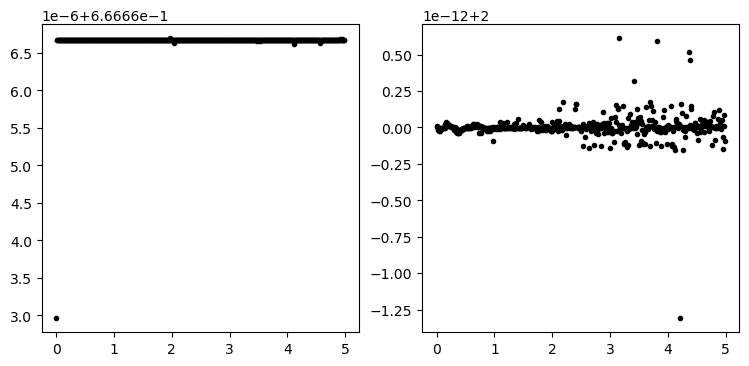

In [54]:
def a1(etat,t,param,h):
    x,y,z=etat
    rx,Kx,ry,Ky,gx,gy,p,n,m = param
    b=h
    xdot,ydot,zdot=[rx*x*(1-x/Kx)+b*(y/gy-x/gx)-p*z*x,ry*y*(1-y/Ky)+b*(x/gx-y/gy)-p*y*z,z*(n*(x+y)-m)]
    return xdot,ydot,zdot

#Paramètres Simulation 1: 
rx1=1
ry1=1.5
Kx1=3
Ky1=2
gx1=0.5
gy1=3
p1=1
n1=0.75
m1=0.5

param_a1=np.array([rx1,Kx1,ry1,Ky1,gx1,gy1,p1,n1,m1])

#Paramètres Simulation 2: 
rx2=0.5
ry2=1
Kx2=1
Ky2=2
gx2=0.5
gy2=3
p2=1
n2=1
m2=2

param_a2=np.array([rx2,Kx2,ry2,Ky2,gx2,gy2,p2,n2,m2])

#Temps d'intégration:
t1=np.arange(0,500,0.01)

#Condition initiale:
x0=1
y0=1
z0=1
c0=np.array([x0,y0,z0])

fig1,(ax1,ax2)=plt.subplots(1,2,figsize=(9,4))

for i in np.arange(0,5,0.01):
    sa1=odeint(a1,c0,t1,args=(param_a1,i))
    ax1.plot(i,sa1[-1][0]+sa1[-1][1],marker='.',color='k')
    sa2=odeint(a1,c0,t1,args=(param_a2,i))
    ax2.plot(i,sa2[-1][0]+sa2[-1][1],marker='.',color='k')

#ax1.plot(xt,(Kx1+Ky1)*np.ones_like(xt),linestyle='dashed',color='k',markersize='6')
#ax2.plot(xt,(Kx2+Ky2)*np.ones_like(xt),linestyle='dashed',color='k',markersize='6')